In [86]:
import pandas as pd
import os

# Specify the path where your CSV files are located
path = ""  # Change this to your directory containing the CSV files

# List of specific CSV file names that you have
csv_files = [
    "2000-01.csv",
    "2001-02.csv",
    "2002-03.csv",
    "2003-04.csv",
    "2004-05.csv",
    "2005-06.csv",
    "2006-07.csv",
    "2007-08.csv",
    "2008-09.csv",
    "2009-10.csv",
    "2010-11.csv",
    "2011-12.csv",
    "2012-13.csv",
    "2013-14.csv",
    "2014-15.csv",
    "2015-16.csv",
    "2016-17.csv",
    "2017-18.csv",
    "2018-19.csv",
    "2019-20.csv",
    "2020-21.csv",
    "2021-22.csv",
    
]

# Initialize a list to hold DataFrames
dataframes = []

# Loop through the list of files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(path, file)  # Create the full file path
    try:
        df = pd.read_csv(file_path)  # Adjust the parameters if needed
        dataframes.append(df)  # Append the DataFrame to the list
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Concatenate all DataFrames into a single DataFrame if any were successfully read
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)
    # Display the merged DataFrame
    print(merged_df)
else:
    raise ValueError("No objects to concatenate")


     Div        Date        HomeTeam  ... MaxCAHA  AvgCAHH  AvgCAHA
0     E0    19/08/00        Charlton  ...     NaN      NaN      NaN
1     E0    19/08/00         Chelsea  ...     NaN      NaN      NaN
2     E0    19/08/00        Coventry  ...     NaN      NaN      NaN
3     E0    19/08/00           Derby  ...     NaN      NaN      NaN
4     E0    19/08/00           Leeds  ...     NaN      NaN      NaN
...   ..         ...             ...  ...     ...      ...      ...
8015  E0  22/05/2022  Crystal Palace  ...    2.25     1.74     2.16
8016  E0  22/05/2022       Leicester  ...    2.26     1.87     2.01
8017  E0  22/05/2022       Liverpool  ...    1.99     2.07     1.80
8018  E0  22/05/2022        Man City  ...    2.03     2.01     1.87
8019  E0  22/05/2022         Norwich  ...    1.98     1.99     1.89

[8020 rows x 144 columns]


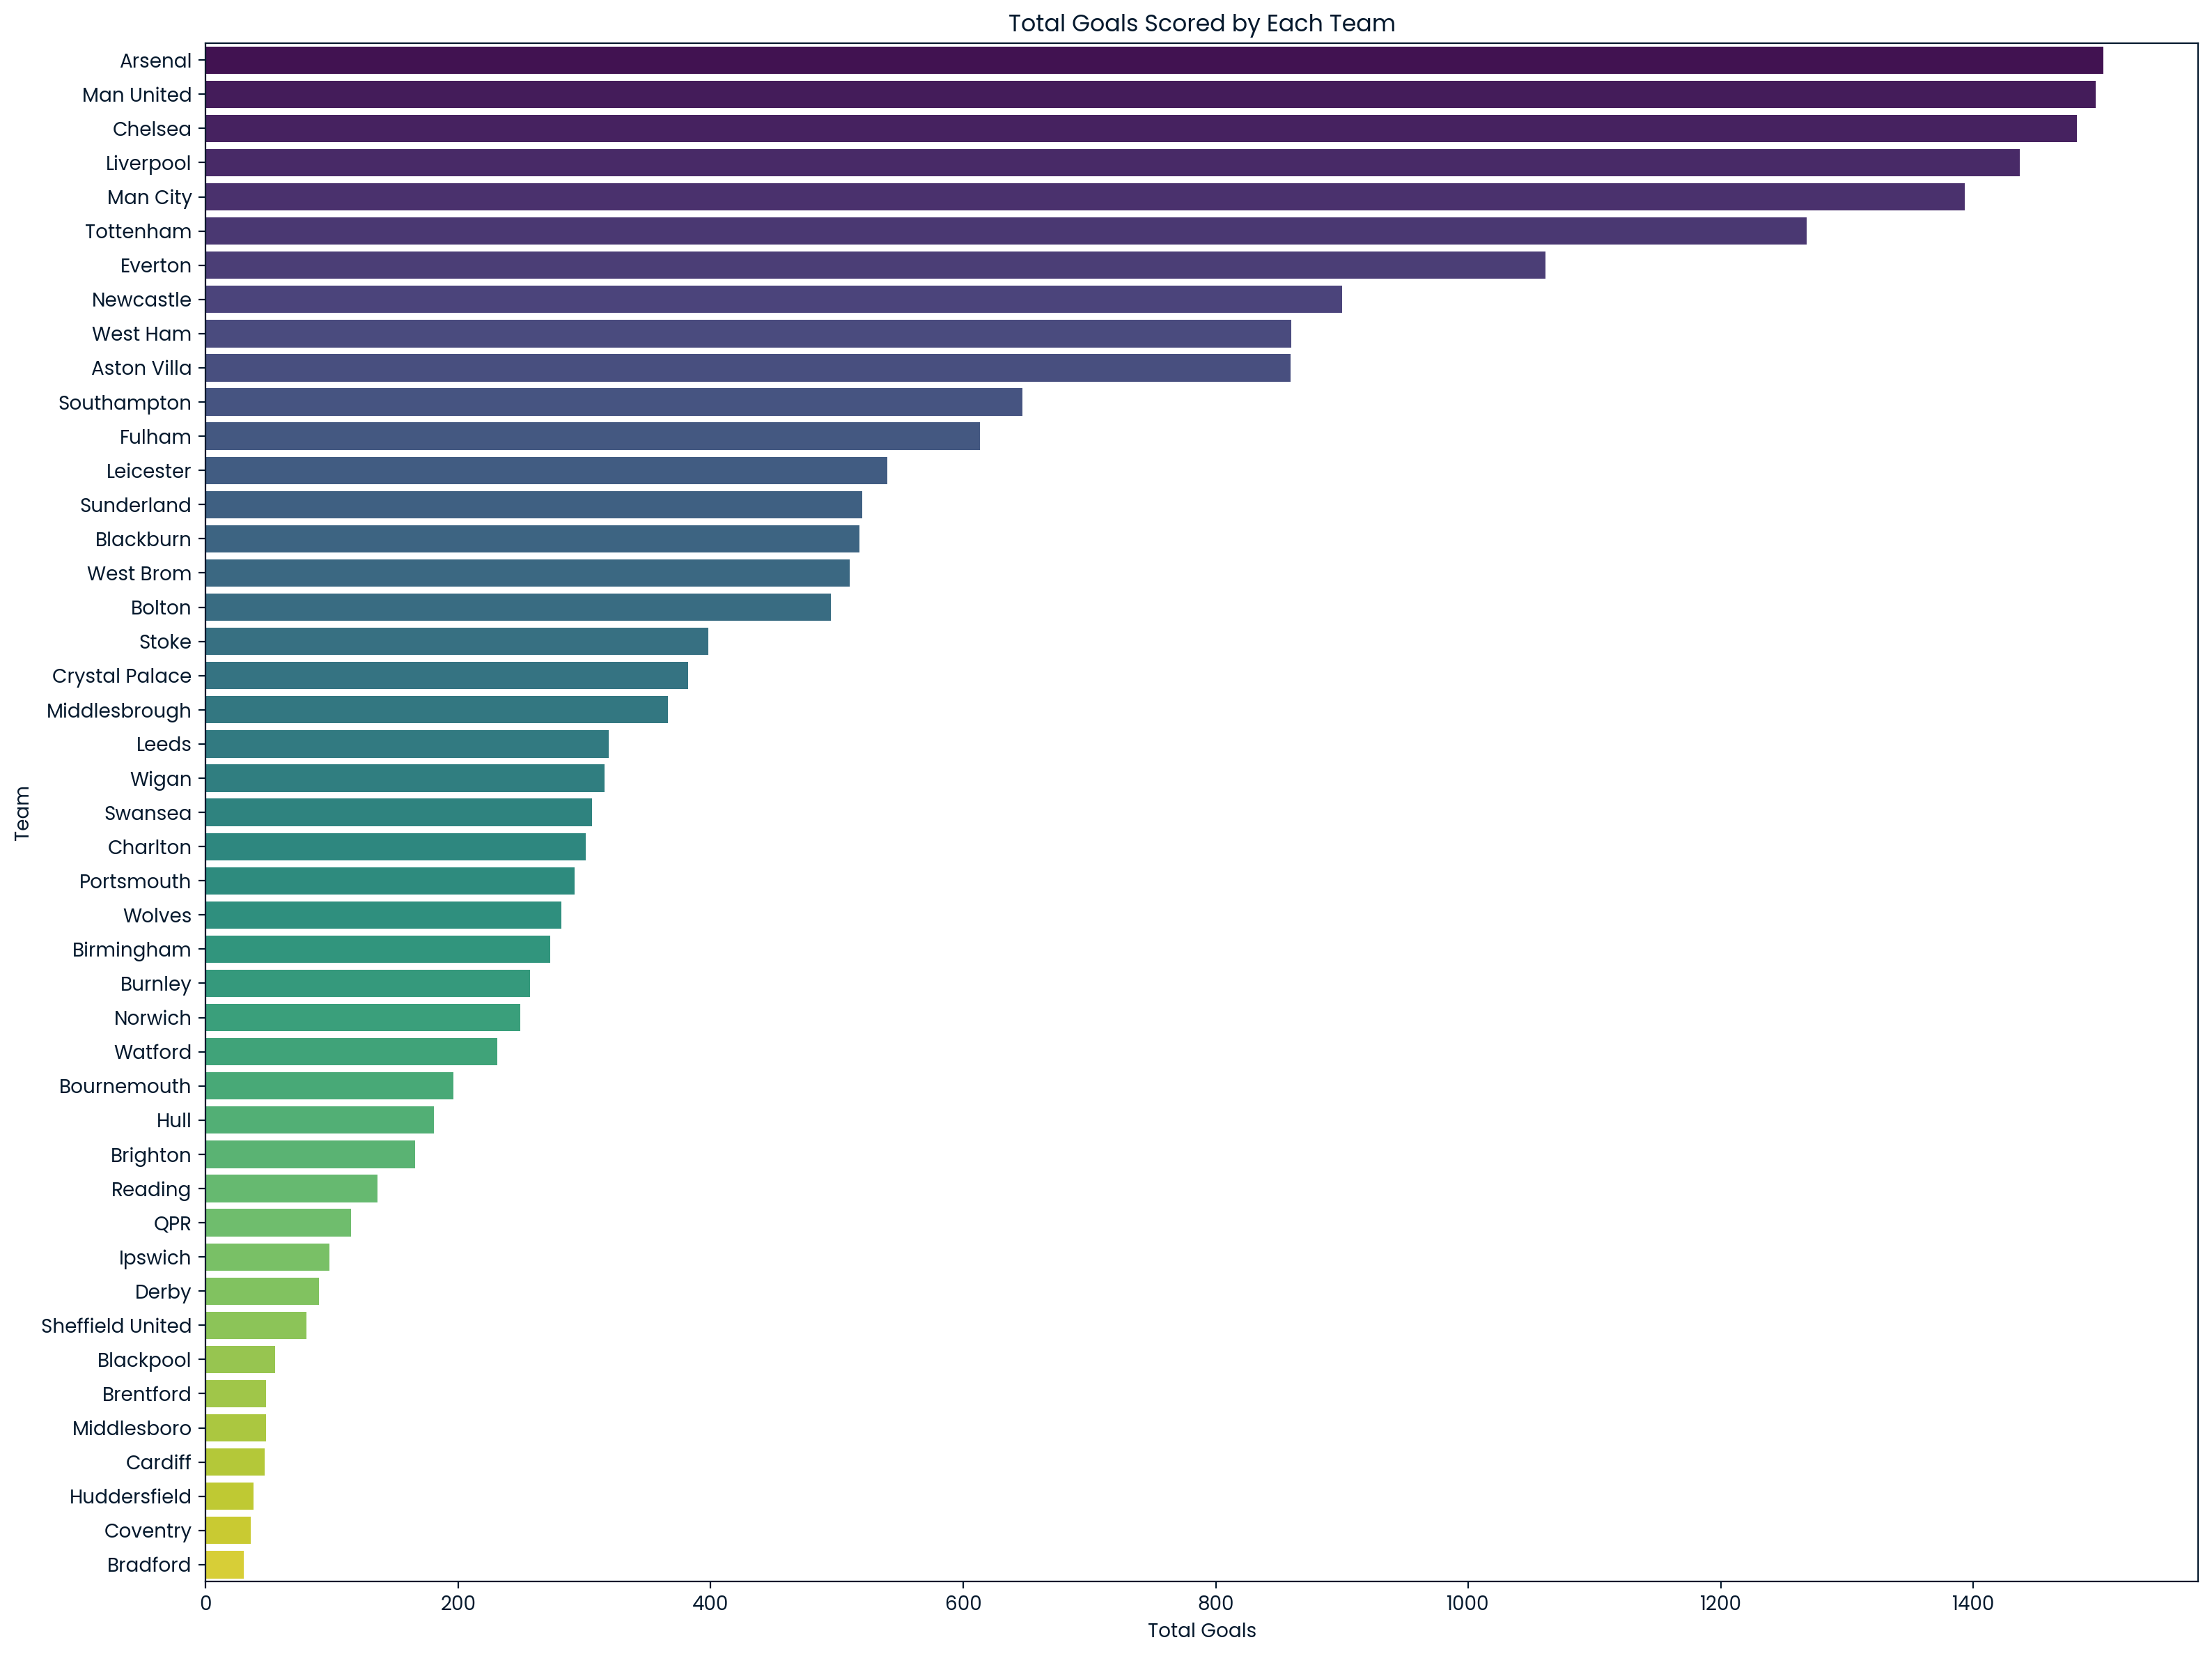

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting total goals scored by each team
plt.figure(figsize=(16, 12))  # Increased figure size for better spacing

# Calculate total goals for home matches
home_goals = merged_df.groupby('HomeTeam')['FTHG'].sum().reset_index()
home_goals.columns = ['Team', 'Total Goals']

# Calculate total goals for away matches
away_goals = merged_df.groupby('AwayTeam')['FTAG'].sum().reset_index()
away_goals.columns = ['Team', 'Total Goals']

# Combine home and away goals
goal_counts = pd.concat([home_goals, away_goals]).groupby('Team')['Total Goals'].sum().reset_index()

# Plotting with horizontal bars
sns.barplot(data=goal_counts.sort_values('Total Goals', ascending=False), y='Team', x='Total Goals', palette='viridis')
plt.title('Total Goals Scored by Each Team')
plt.ylabel('Team')
plt.xlabel('Total Goals')
plt.tight_layout()  # Adjust the layout to make room for the labels
plt.show()


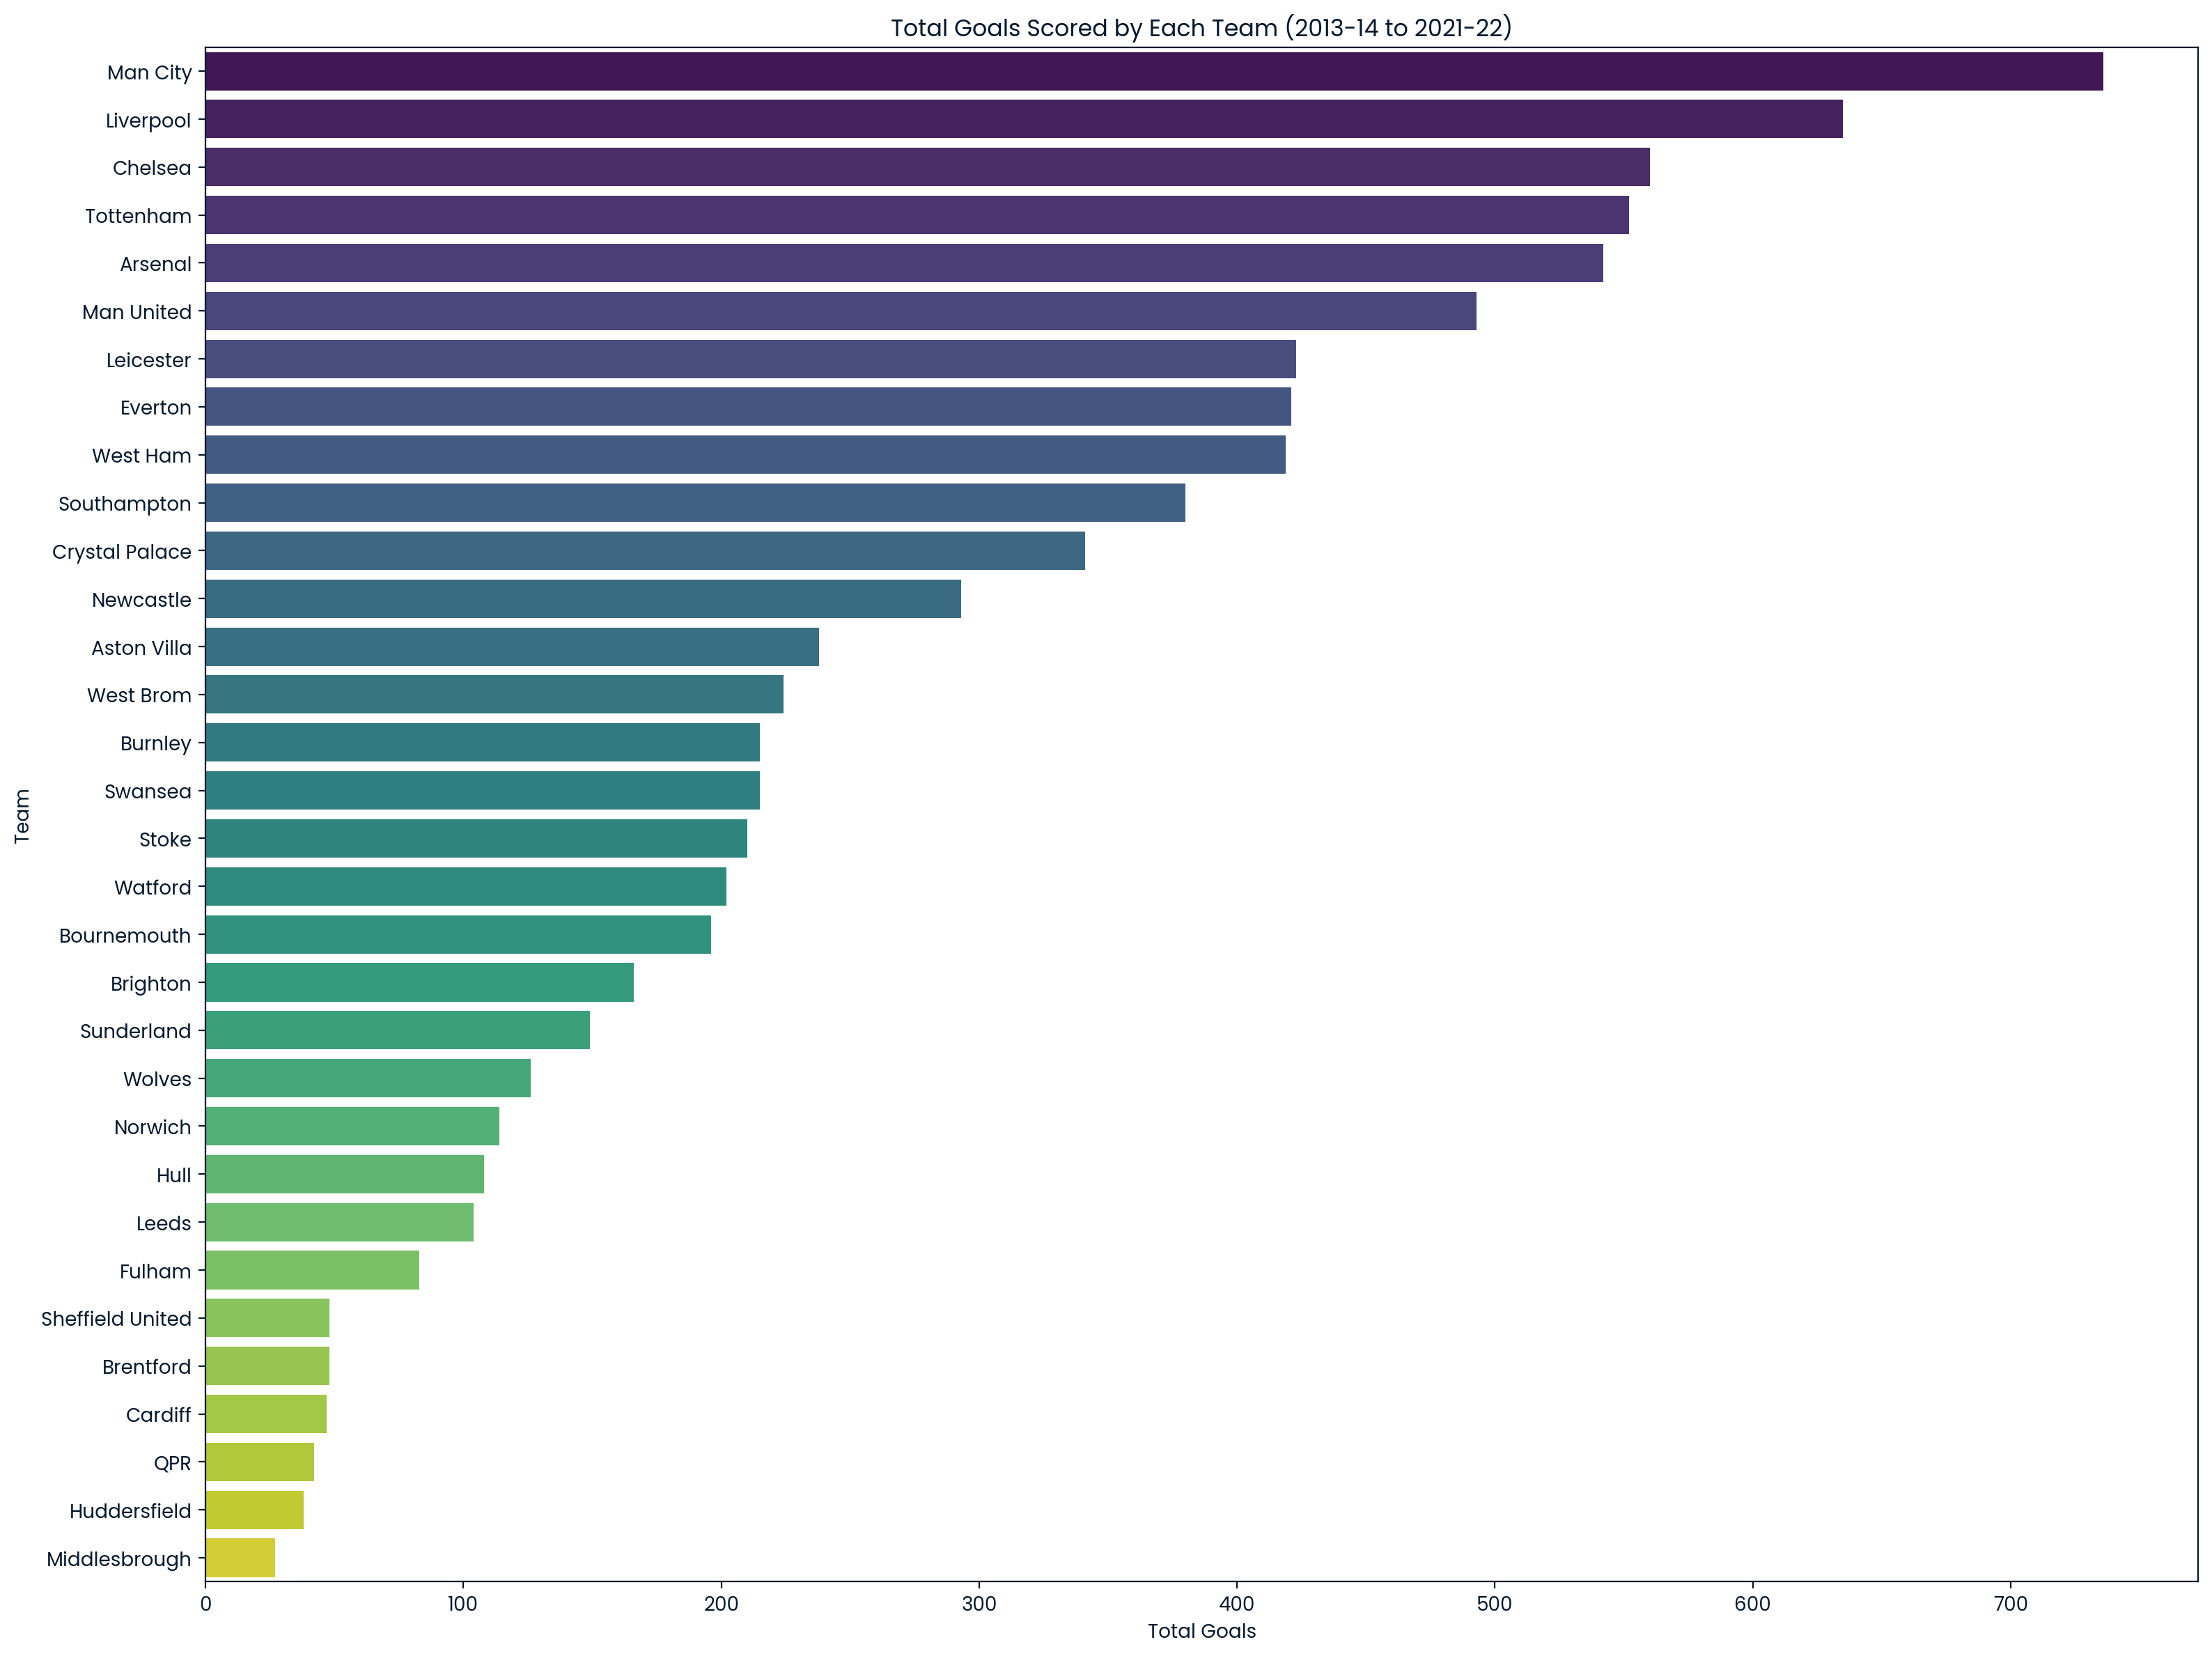

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_df is your DataFrame and 'Date' is in 'dd/mm/yy' format
# Convert 'Date' to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True, errors='coerce')

# Filter for seasons from 2013-14 to 2021-22
start_date = '2013-08-01'
end_date = '2022-05-31'
filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Plotting total goals scored by each team
plt.figure(figsize=(16, 12))  # Increased figure size for better spacing

# Calculate total goals for home matches
home_goals = filtered_df.groupby('HomeTeam')['FTHG'].sum().reset_index()
home_goals.columns = ['Team', 'Total Goals']

# Calculate total goals for away matches
away_goals = filtered_df.groupby('AwayTeam')['FTAG'].sum().reset_index()
away_goals.columns = ['Team', 'Total Goals']

# Combine home and away goals
goal_counts = pd.concat([home_goals, away_goals]).groupby('Team')['Total Goals'].sum().reset_index()

# Plotting with horizontal bars
sns.barplot(data=goal_counts.sort_values('Total Goals', ascending=False), y='Team', x='Total Goals', palette='viridis')
plt.title('Total Goals Scored by Each Team (2013-14 to 2021-22)')
plt.ylabel('Team')
plt.xlabel('Total Goals')
plt.tight_layout()  # Adjust the layout to make room for the labels
plt.show()


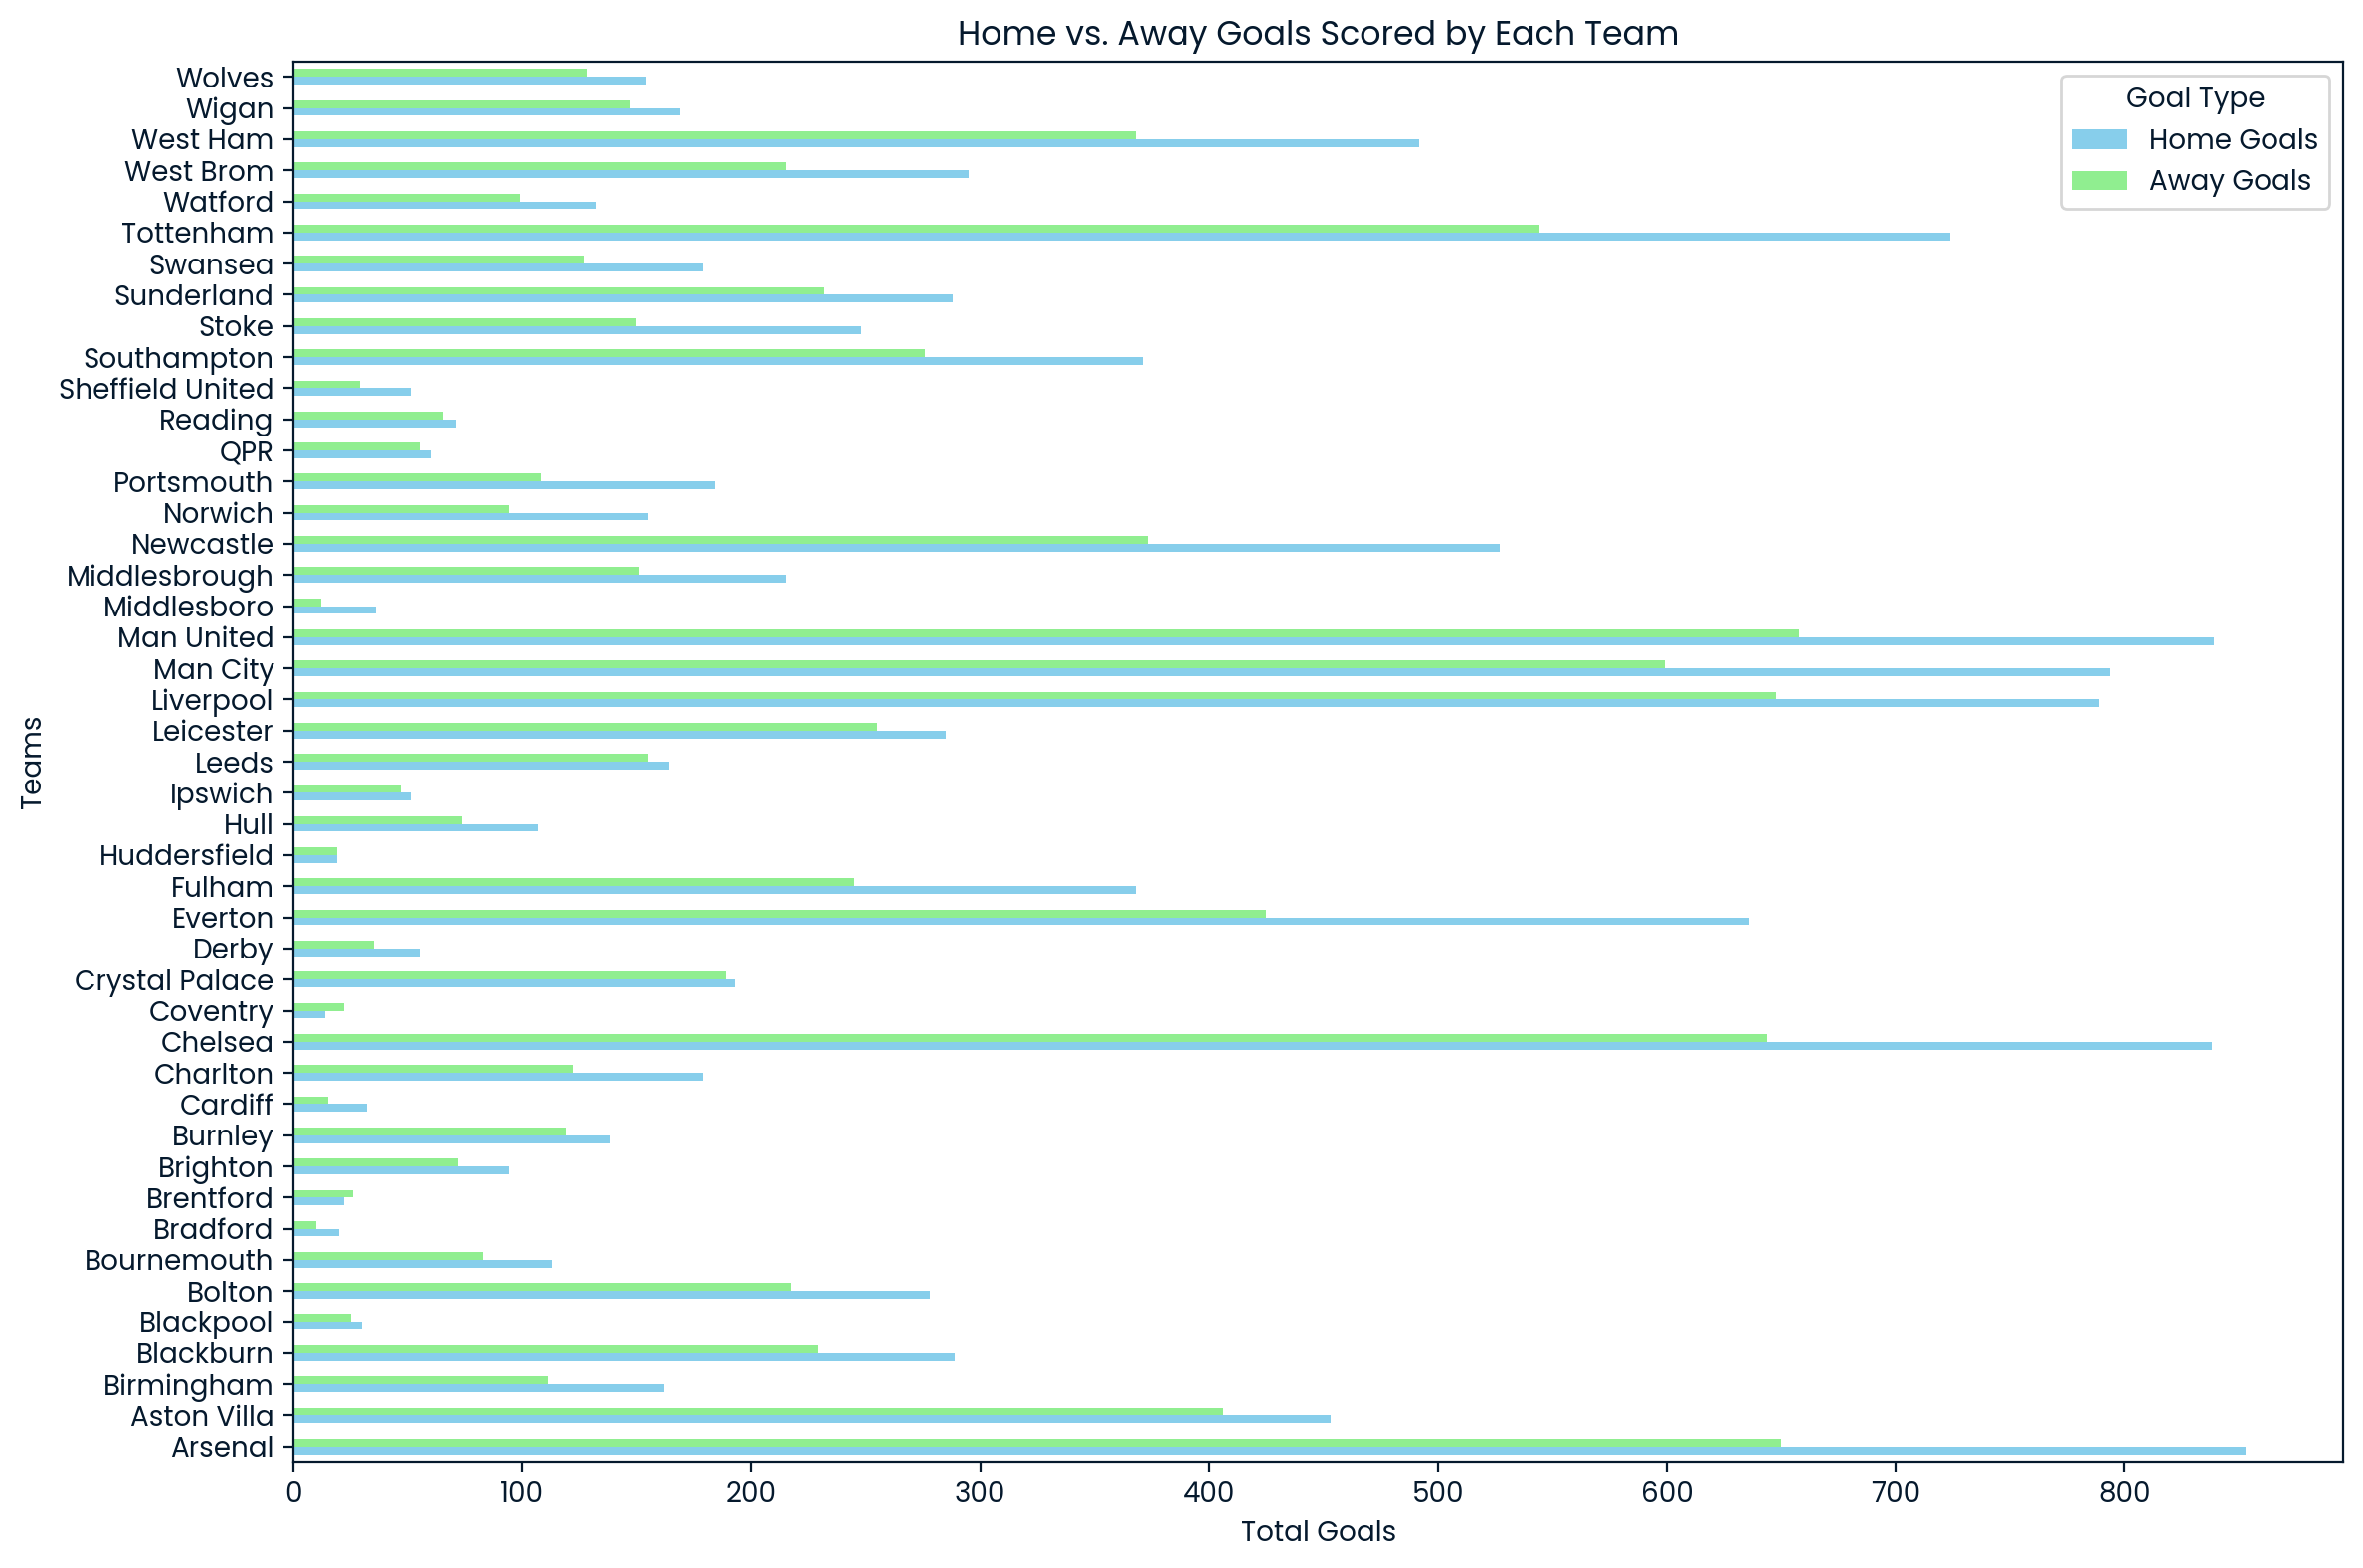

In [89]:
# Calculate total home and away goals for each team
home_goals = merged_df.groupby('HomeTeam')['FTHG'].sum().reset_index()
home_goals.columns = ['Team', 'Home Goals']

away_goals = merged_df.groupby('AwayTeam')['FTAG'].sum().reset_index()
away_goals.columns = ['Team', 'Away Goals']

# Merge the two dataframes
home_away_goals = pd.merge(home_goals, away_goals, on='Team', how='outer').fillna(0)

# Set the index for easier plotting
home_away_goals.set_index('Team', inplace=True)

# Plotting
home_away_goals.plot(kind='barh', figsize=(12, 8), color=['skyblue', 'lightgreen'])
plt.title('Home vs. Away Goals Scored by Each Team')
plt.xlabel('Total Goals')
plt.ylabel('Teams')
plt.legend(title='Goal Type')
plt.tight_layout()
plt.show()


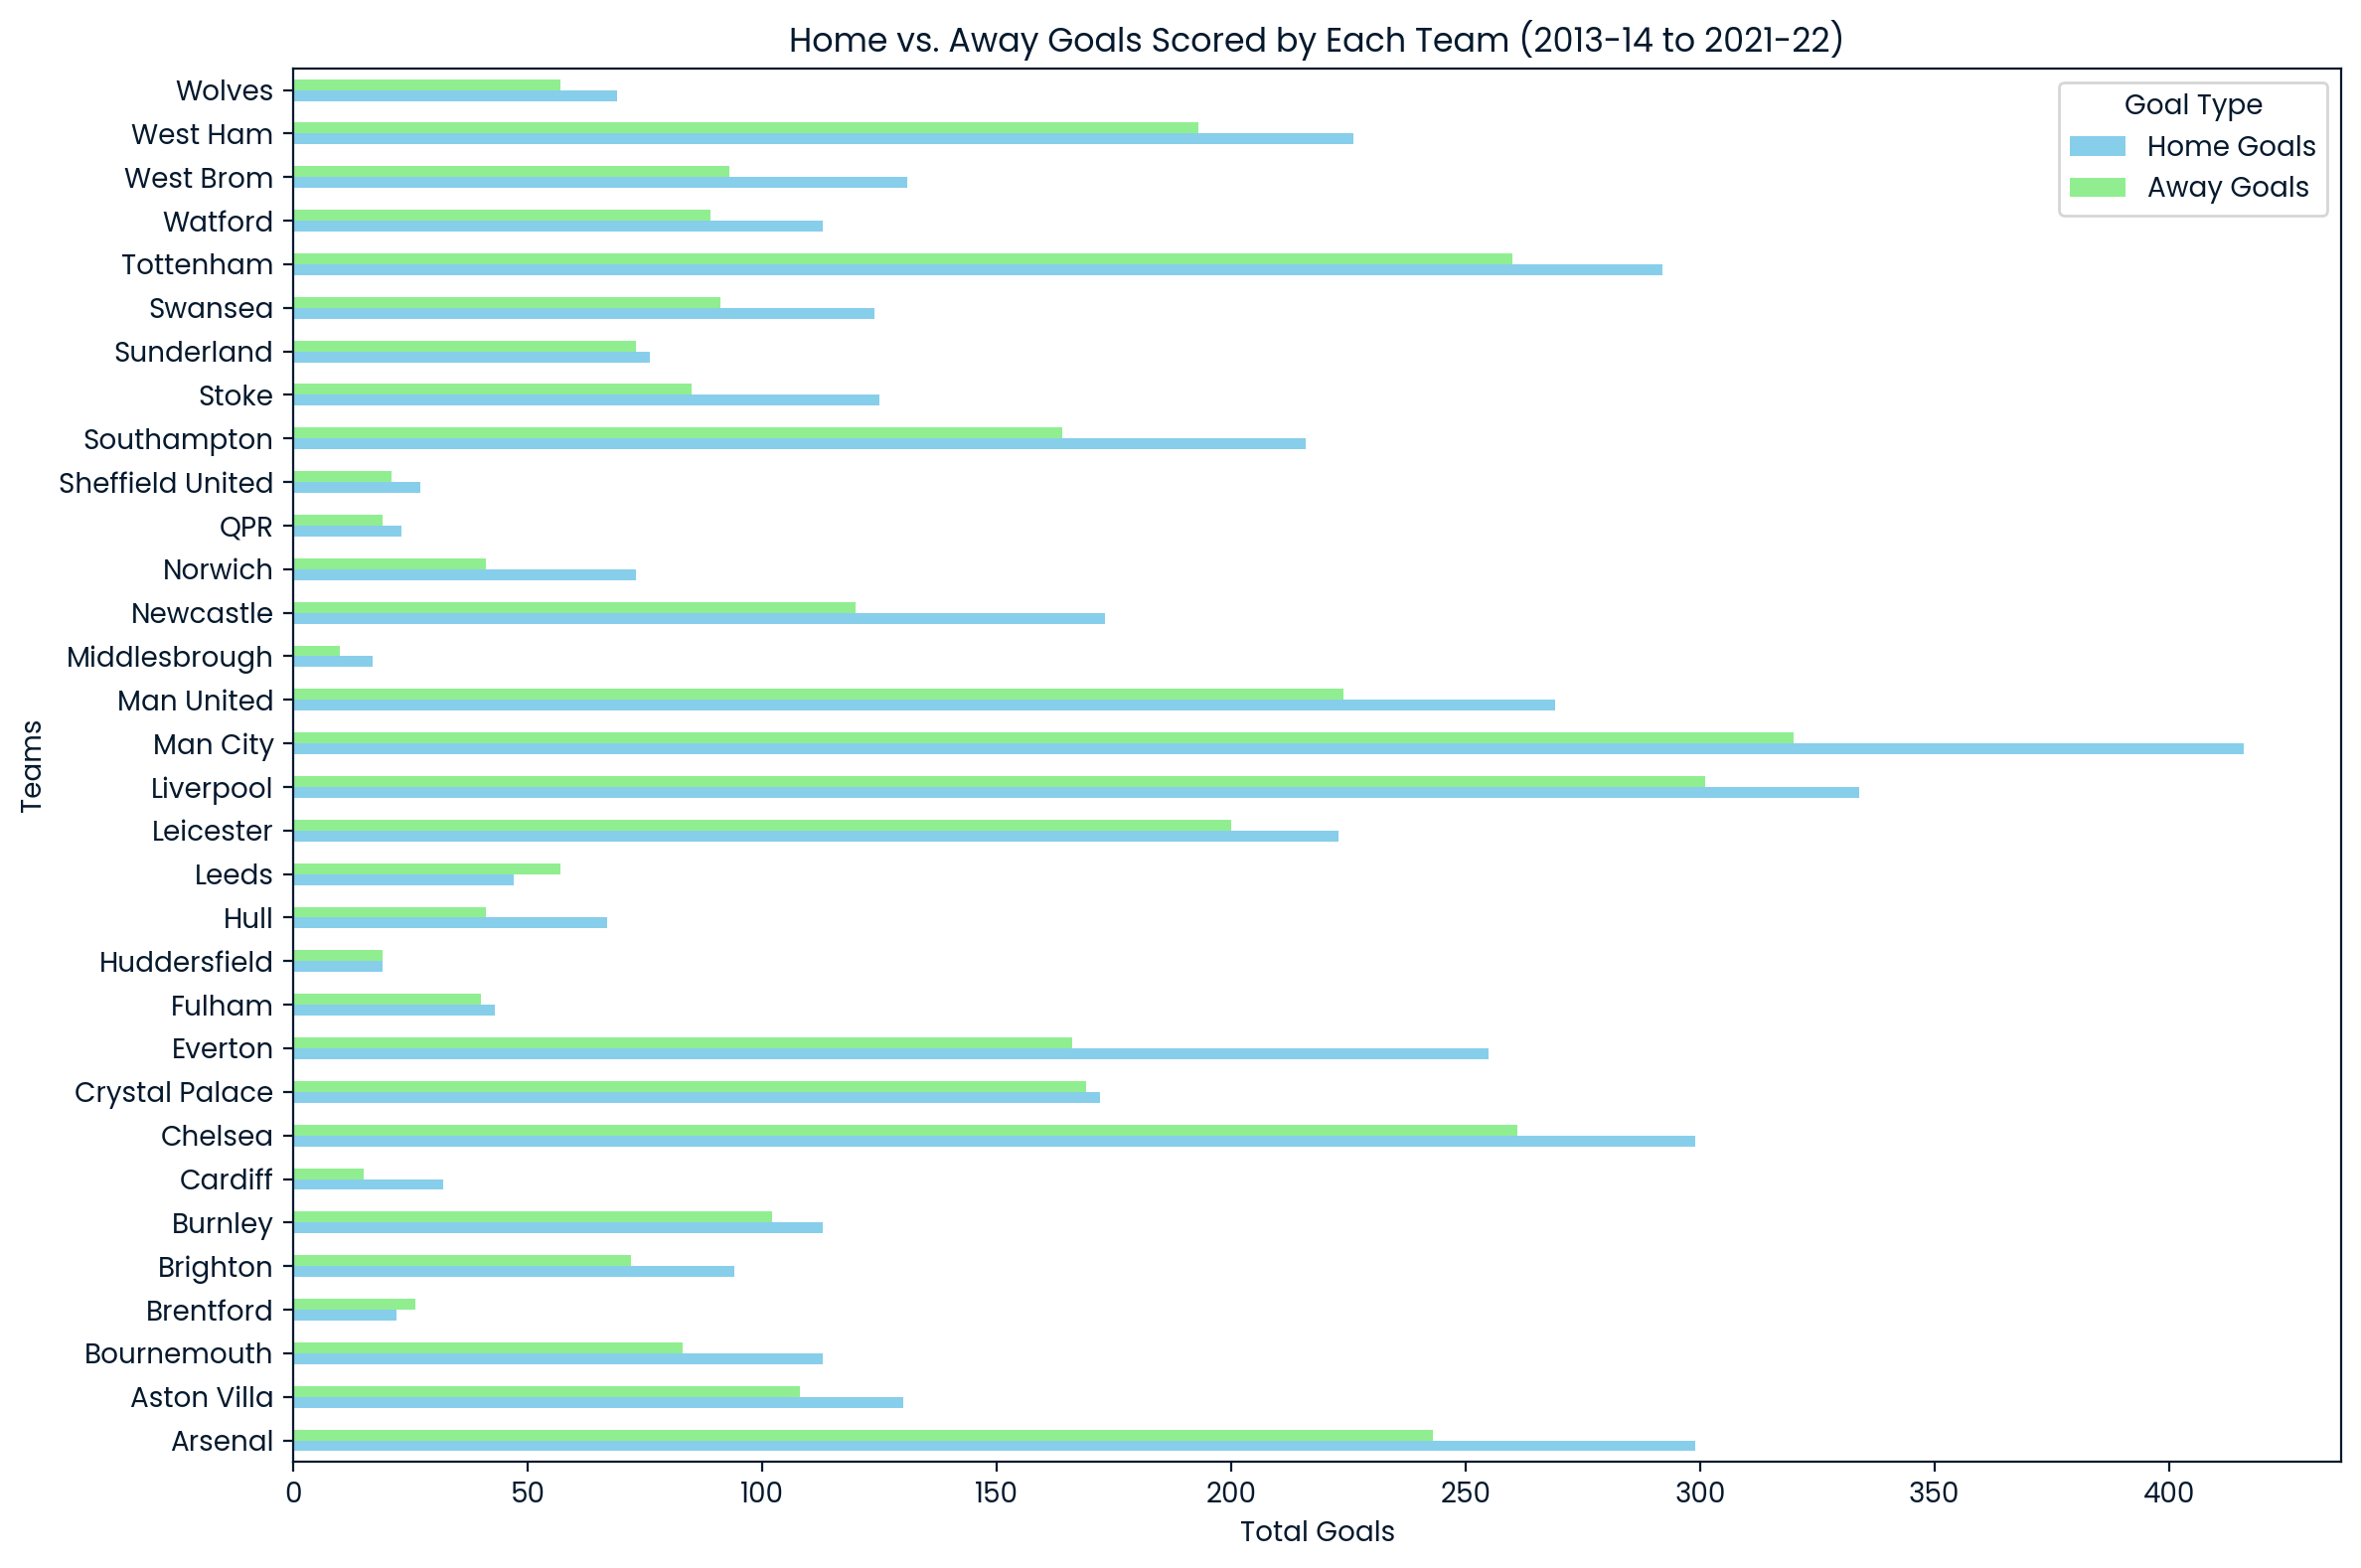

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is your DataFrame and 'Date' is in 'dd/mm/yy' format
# Convert 'Date' to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True, errors='coerce')

# Filter for seasons from 2013-14 to 2021-22
start_date = '2013-08-01'
end_date = '2022-05-31'
filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Calculate total home and away goals for each team
home_goals = filtered_df.groupby('HomeTeam')['FTHG'].sum().reset_index()
home_goals.columns = ['Team', 'Home Goals']

away_goals = filtered_df.groupby('AwayTeam')['FTAG'].sum().reset_index()
away_goals.columns = ['Team', 'Away Goals']

# Merge the two dataframes
home_away_goals = pd.merge(home_goals, away_goals, on='Team', how='outer').fillna(0)

# Set the index for easier plotting
home_away_goals.set_index('Team', inplace=True)

# Plotting
home_away_goals.plot(kind='barh', figsize=(12, 8), color=['skyblue', 'lightgreen'])
plt.title('Home vs. Away Goals Scored by Each Team (2013-14 to 2021-22)')
plt.xlabel('Total Goals')
plt.ylabel('Teams')
plt.legend(title='Goal Type')
plt.tight_layout()
plt.show()


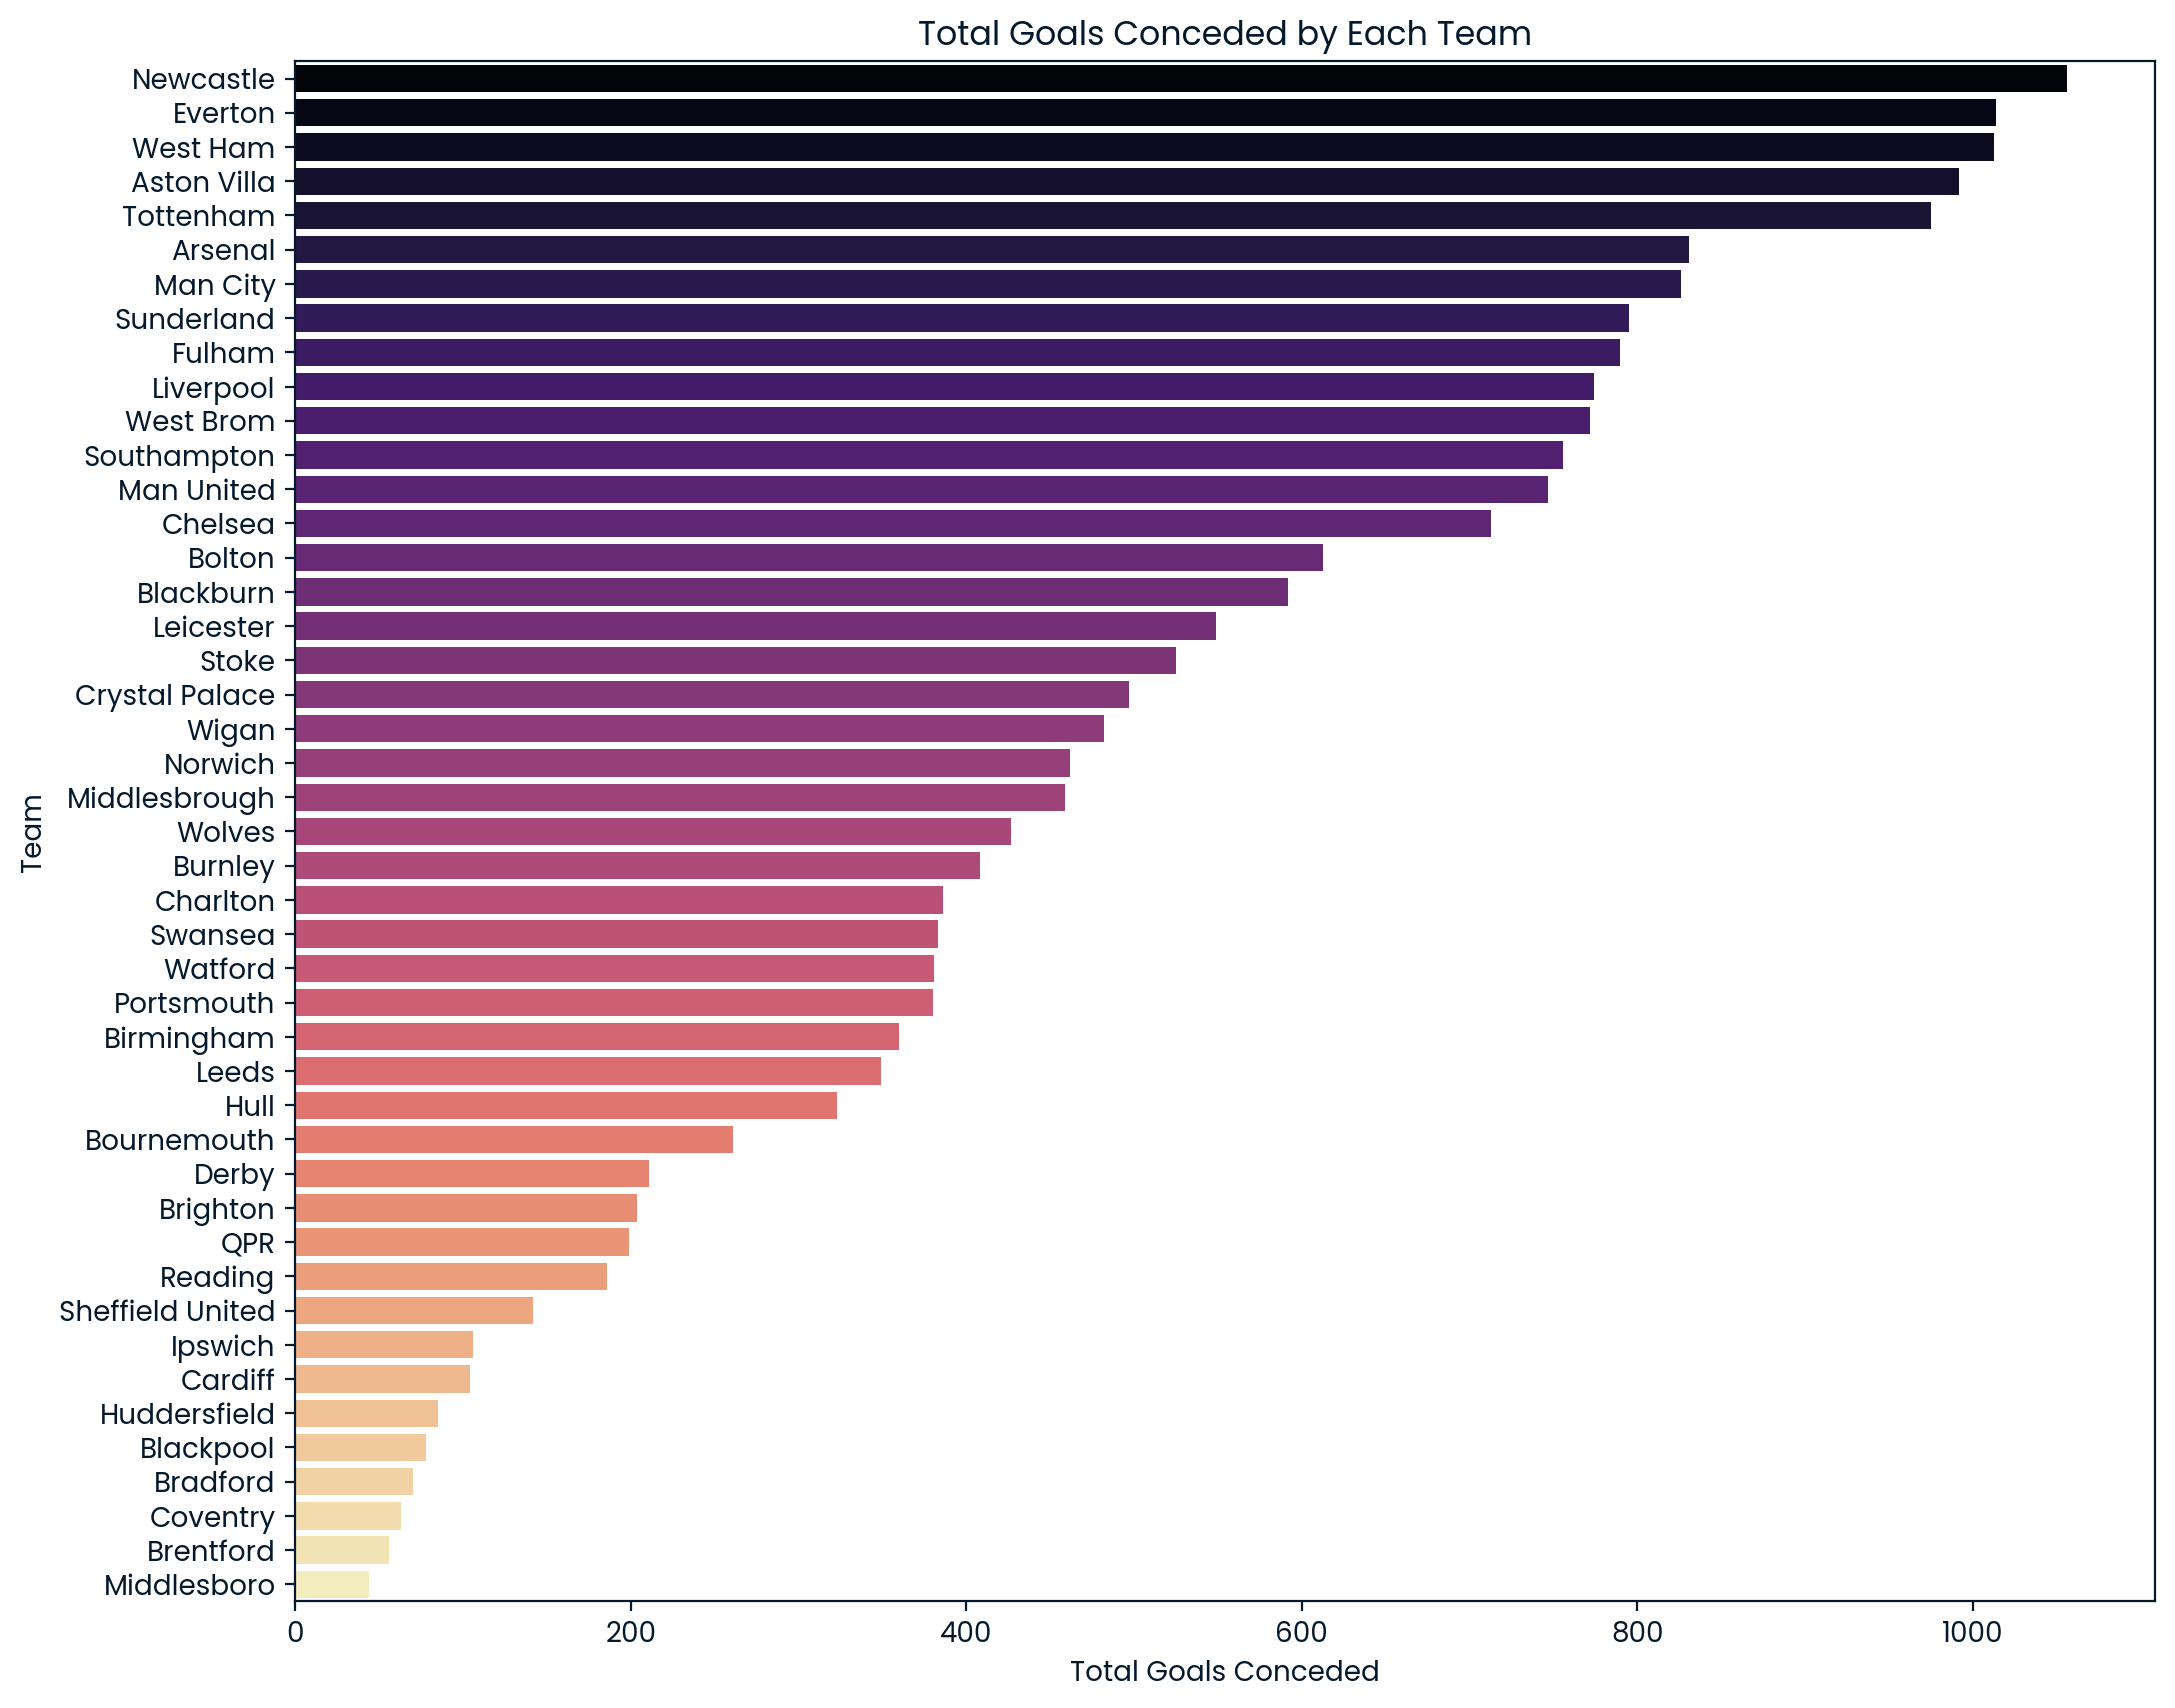

In [91]:
# Calculate total goals conceded
conceded_goals = merged_df.groupby('HomeTeam')['FTAG'].sum().reset_index()
conceded_goals.columns = ['Team', 'Goals Conceded Home']

away_conceded_goals = merged_df.groupby('AwayTeam')['FTHG'].sum().reset_index()
away_conceded_goals.columns = ['Team', 'Goals Conceded Away']

# Merge the two dataframes
total_conceded = pd.merge(conceded_goals, away_conceded_goals, on='Team', how='outer').fillna(0)
total_conceded['Total Conceded'] = total_conceded['Goals Conceded Home'] + total_conceded['Goals Conceded Away']

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(data=total_conceded.sort_values('Total Conceded', ascending=False), 
            y='Team', x='Total Conceded', palette='magma')
plt.title('Total Goals Conceded by Each Team')
plt.xlabel('Total Goals Conceded')
plt.ylabel('Team')
plt.show()


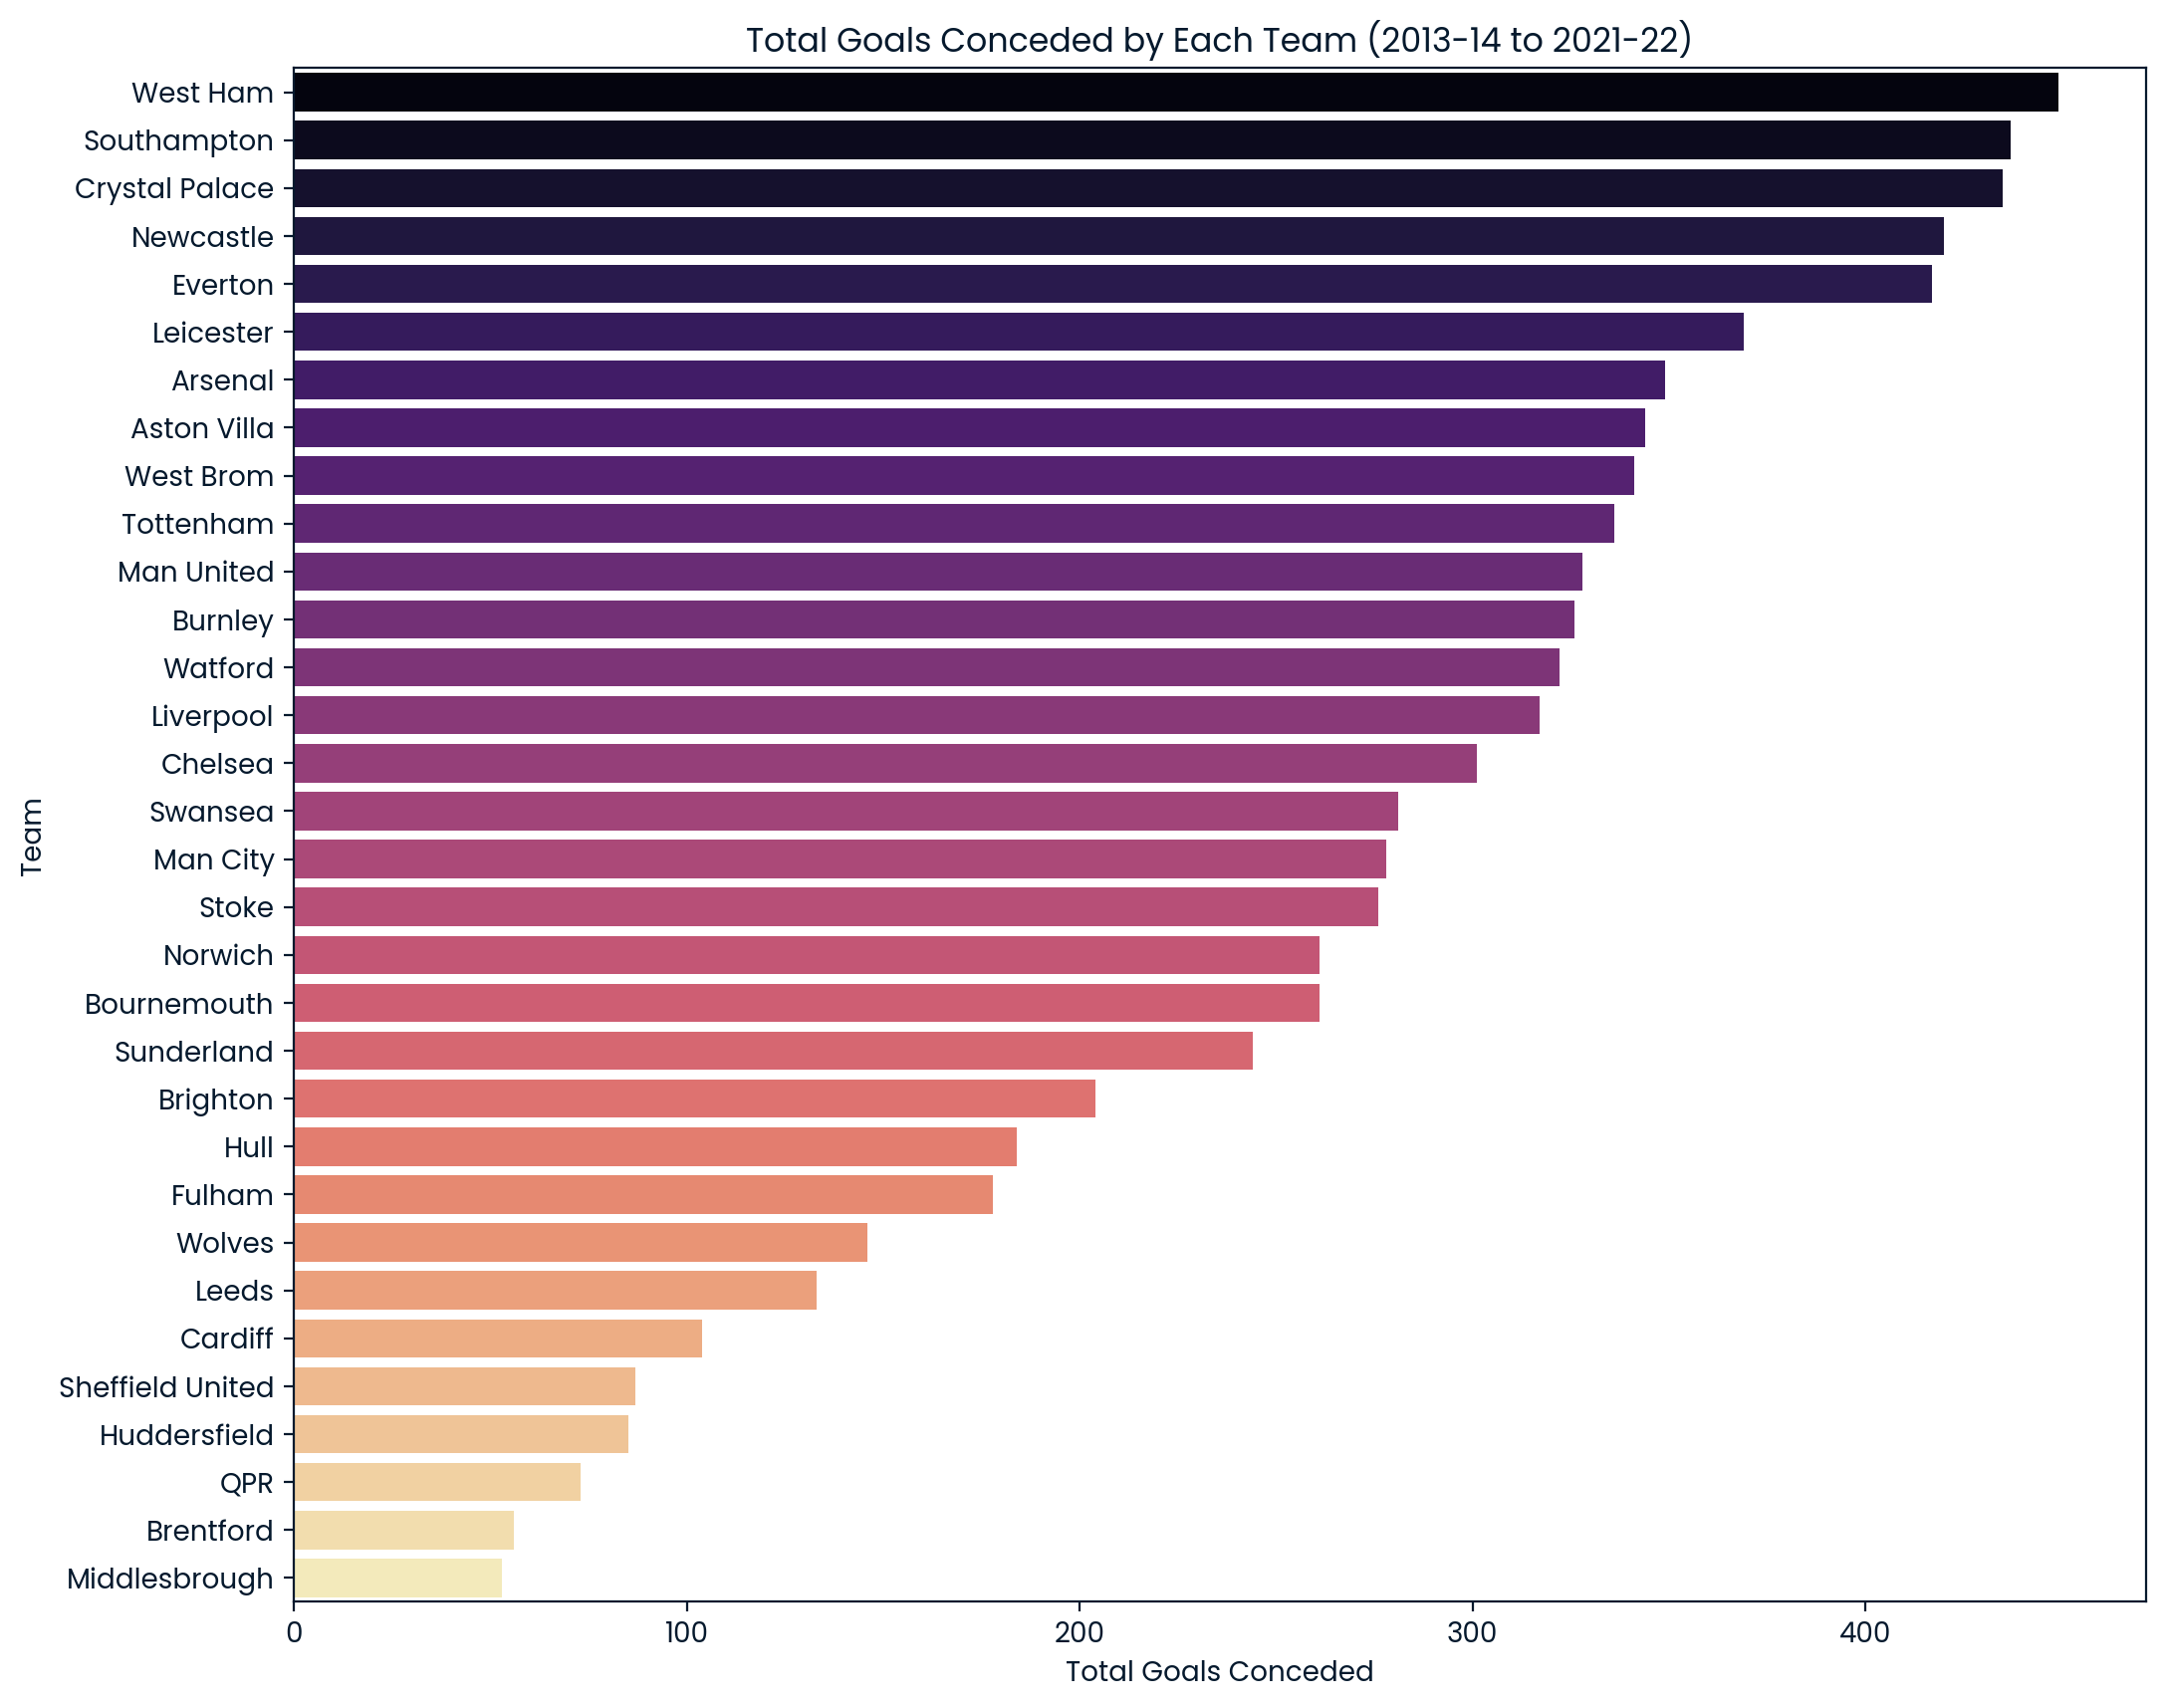

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_df is your DataFrame and 'Date' is in 'dd/mm/yy' format
# Convert 'Date' to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True, errors='coerce')

# Filter for seasons from 2013-14 to 2021-22
start_date = '2013-08-01'
end_date = '2022-05-31'
filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Calculate total goals conceded
conceded_goals = filtered_df.groupby('HomeTeam')['FTAG'].sum().reset_index()
conceded_goals.columns = ['Team', 'Goals Conceded Home']

away_conceded_goals = filtered_df.groupby('AwayTeam')['FTHG'].sum().reset_index()
away_conceded_goals.columns = ['Team', 'Goals Conceded Away']

# Merge the two dataframes
total_conceded = pd.merge(conceded_goals, away_conceded_goals, on='Team', how='outer').fillna(0)
total_conceded['Total Conceded'] = total_conceded['Goals Conceded Home'] + total_conceded['Goals Conceded Away']

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(data=total_conceded.sort_values('Total Conceded', ascending=False), 
            y='Team', x='Total Conceded', palette='magma')
plt.title('Total Goals Conceded by Each Team (2013-14 to 2021-22)')
plt.xlabel('Total Goals Conceded')
plt.ylabel('Team')
plt.show()


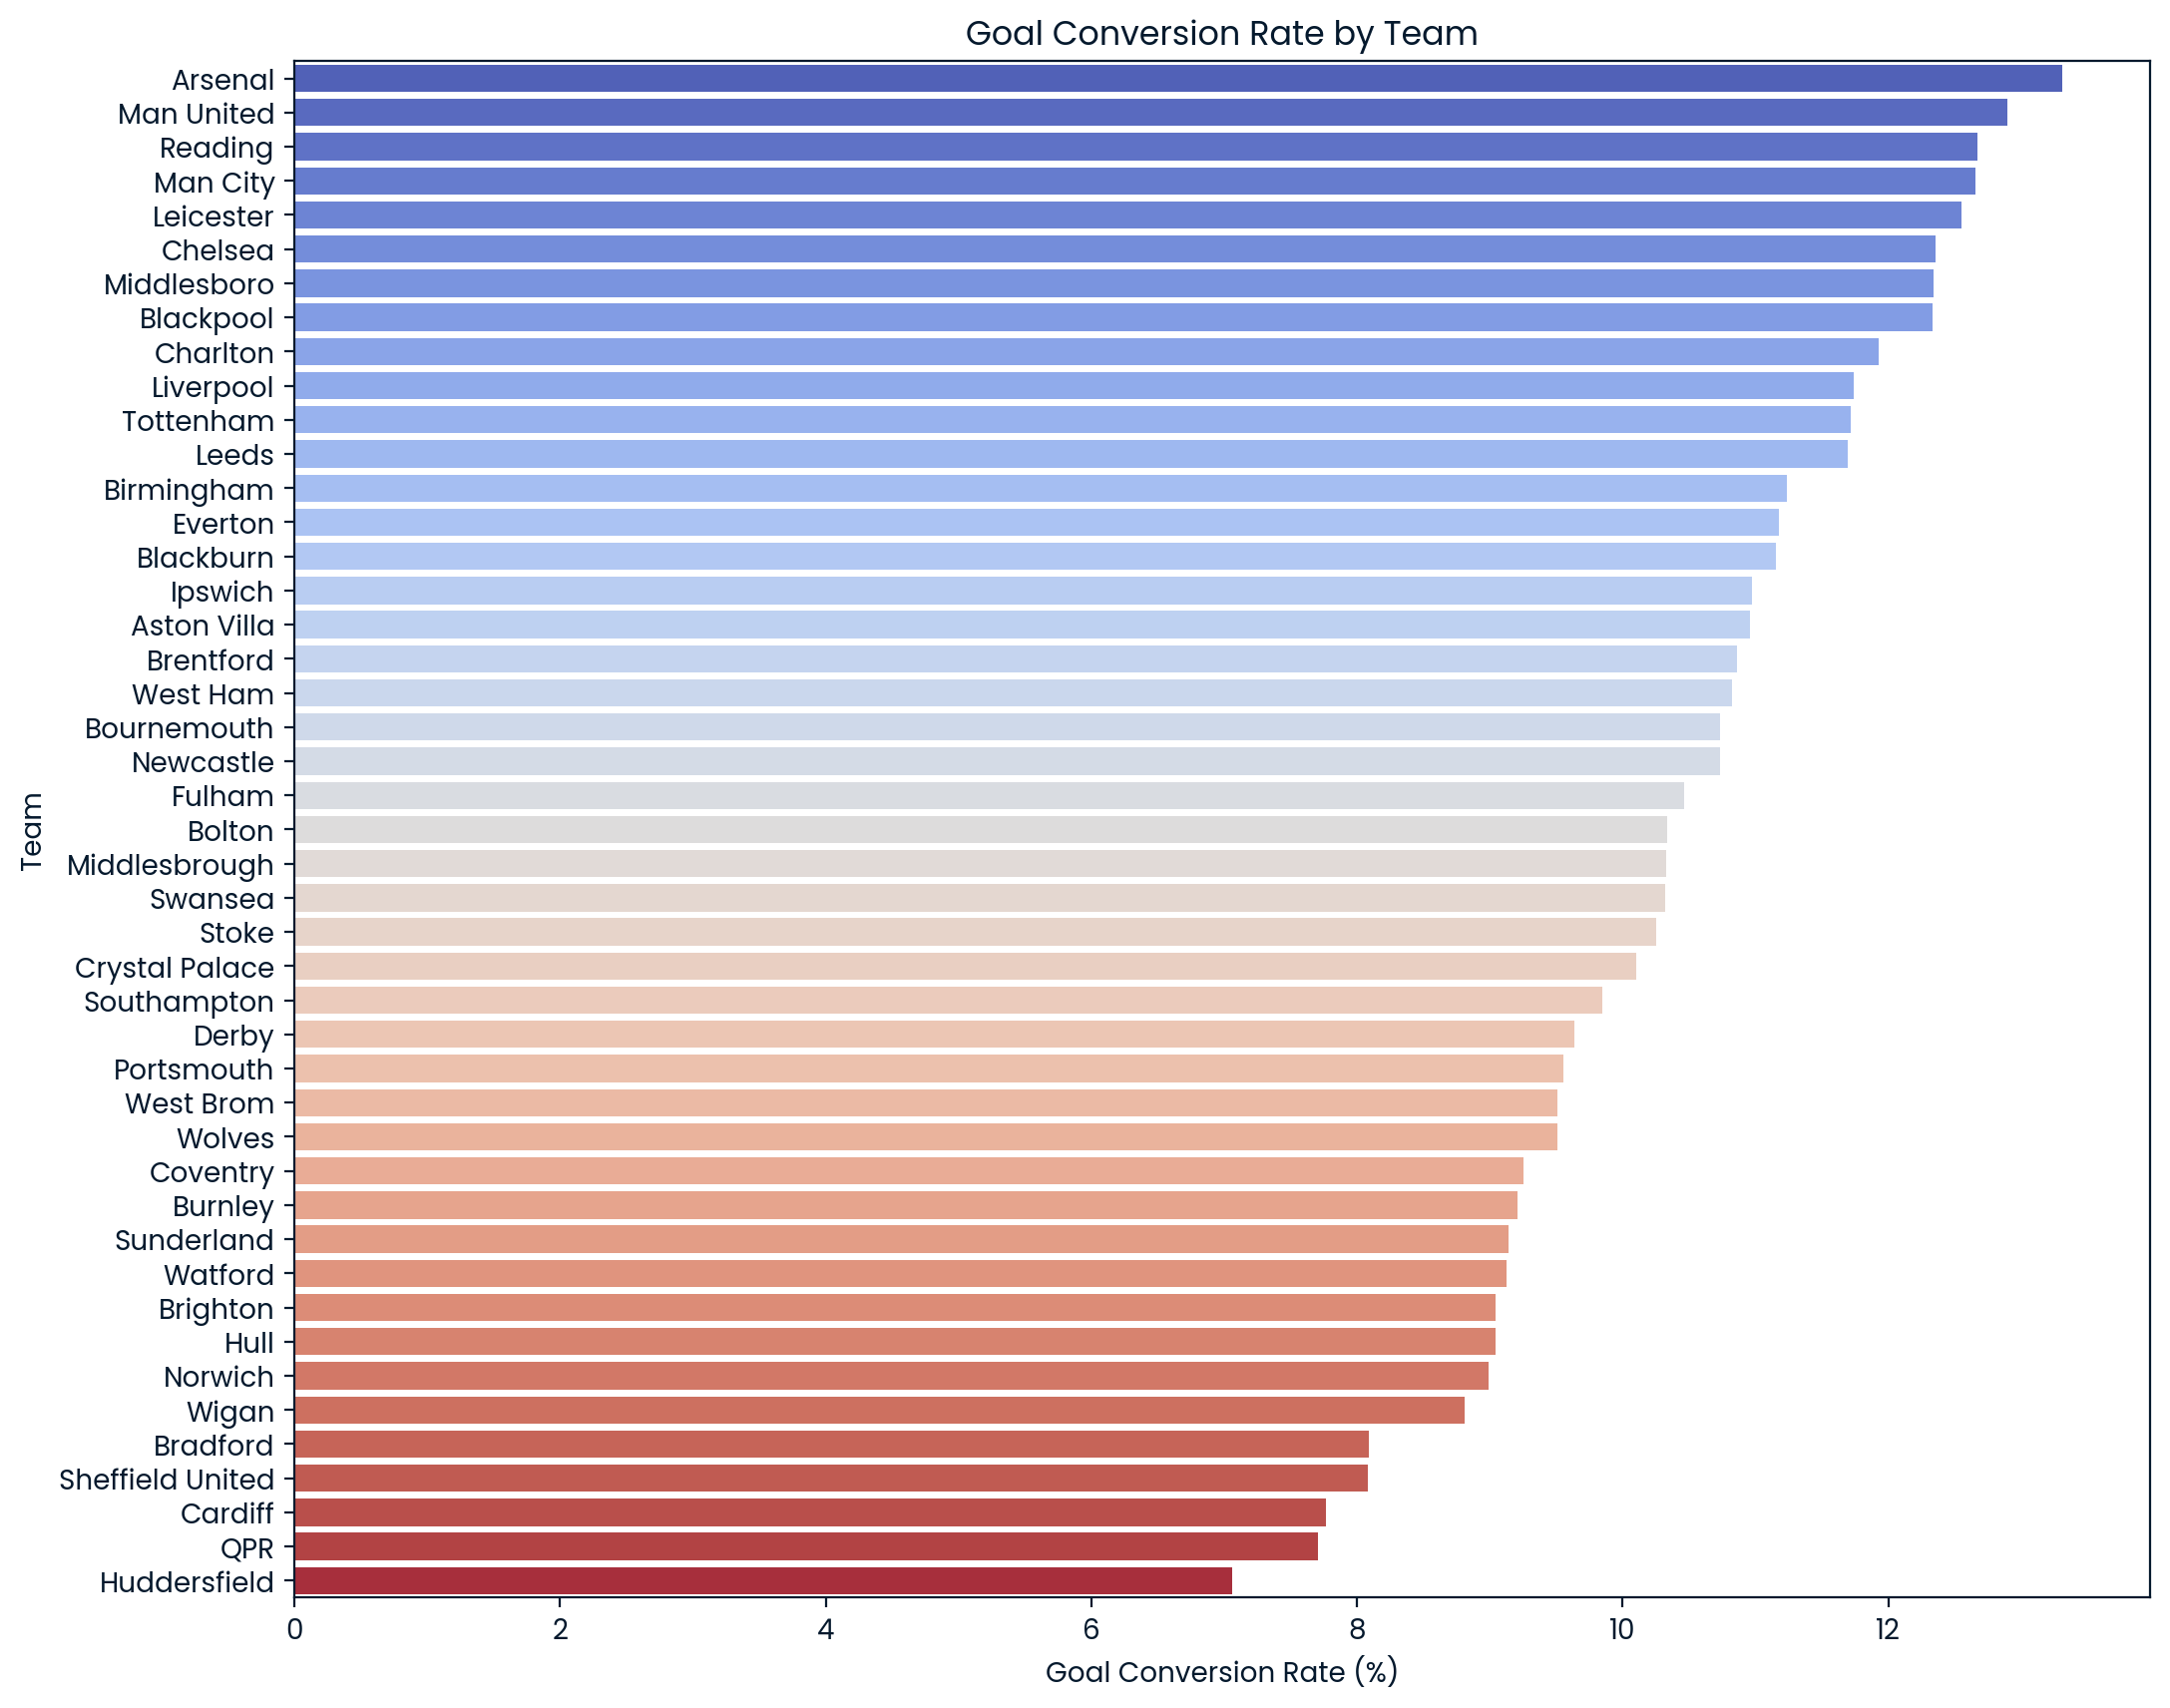

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate total home goals
home_goals = merged_df.groupby('HomeTeam')['FTHG'].sum().reset_index()
home_goals.columns = ['Team', 'Total Goals']

# Calculate total away goals
away_goals = merged_df.groupby('AwayTeam')['FTAG'].sum().reset_index()
away_goals.columns = ['Team', 'Total Goals']

# Combine home and away goals into a single DataFrame
goal_counts = pd.concat([home_goals, away_goals.rename(columns={'Team': 'Team', 'Total Goals': 'Total Goals'})])
goal_counts = goal_counts.groupby('Team')['Total Goals'].sum().reset_index()

# Calculate total shots for home and away teams
home_shots = merged_df.groupby('HomeTeam')['HS'].sum().reset_index()
home_shots.columns = ['Team', 'Home Shots']

away_shots = merged_df.groupby('AwayTeam')['AS'].sum().reset_index()
away_shots.columns = ['Team', 'Away Shots']

# Merge the shots dataframes
total_shots = pd.merge(home_shots, away_shots, on='Team', how='outer').fillna(0)
total_shots['Total Shots'] = total_shots['Home Shots'] + total_shots['Away Shots']

# Merge the total shots with goal counts
total_shots = pd.merge(total_shots, goal_counts, on='Team', how='outer').fillna(0)

# Calculate conversion rate
total_shots['Goal Conversion Rate (%)'] = (total_shots['Total Goals'] / total_shots['Total Shots']) * 100

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(data=total_shots.sort_values('Goal Conversion Rate (%)', ascending=False),
            y='Team', x='Goal Conversion Rate (%)', palette='coolwarm')
plt.title('Goal Conversion Rate by Team')
plt.xlabel('Goal Conversion Rate (%)')
plt.ylabel('Team')
plt.show()


0   2000-08-19
1   2000-08-19
2   2000-08-19
3   2000-08-19
4   2000-08-19
5   2000-08-19
6   2000-08-19
7   2000-08-19
8   2000-08-19
9   2000-08-20
Name: Date, dtype: datetime64[ns]


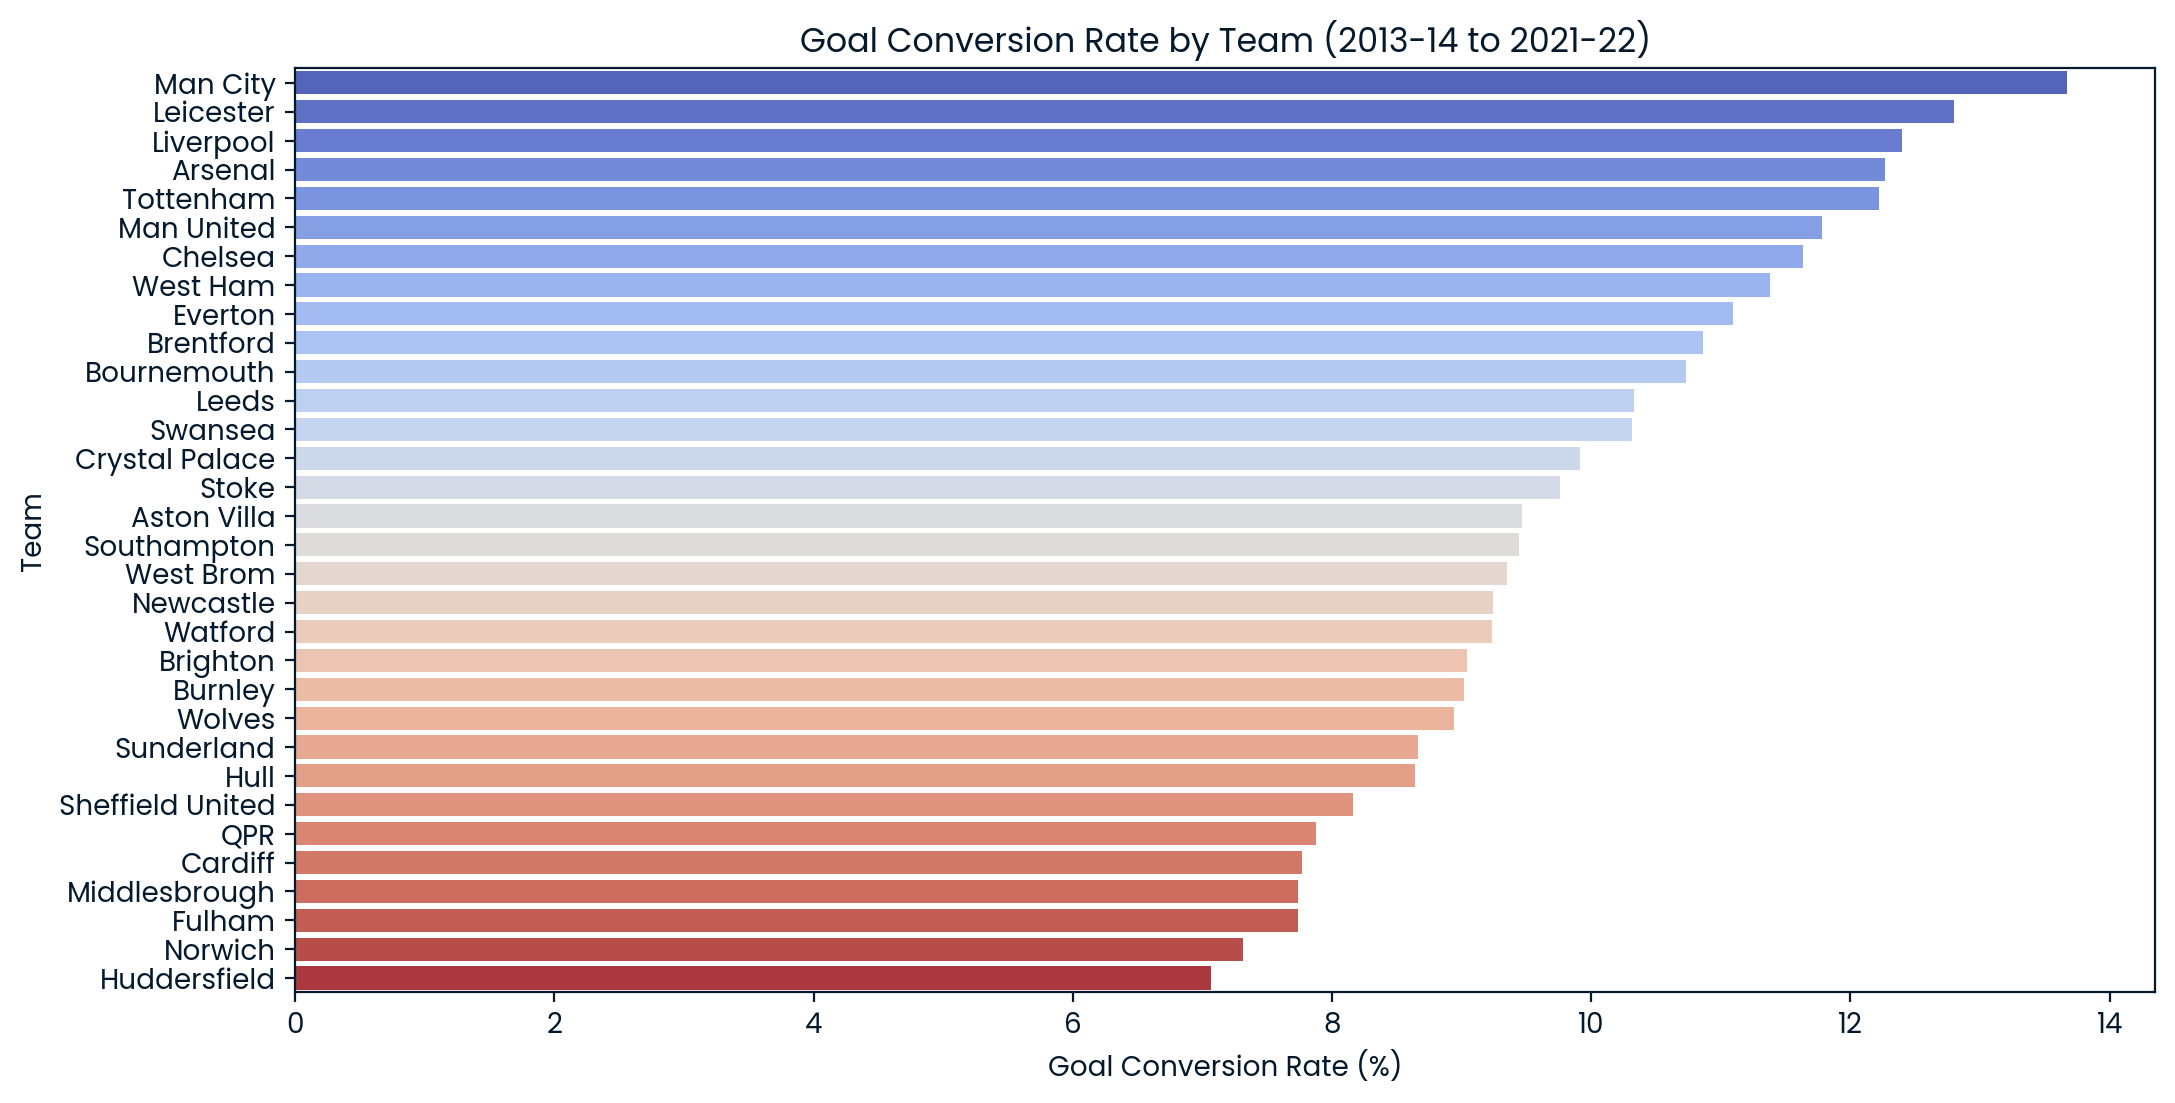

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Checking the first few rows of the 'Date' column to identify any inconsistencies
print(merged_df['Date'].head(10))

# Attempting to convert the 'Date' column
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True, errors='coerce')

# Checking for NaT values in the 'Date' column after conversion
if merged_df['Date'].isnull().any():
    print("There are invalid date entries. Here are the rows with NaT in 'Date':")
    print(merged_df[merged_df['Date'].isnull()])

# Filter for seasons from 2013-14 to 2021-22
start_date = '2013-08-01'
end_date = '2022-05-31'
filtered_df = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]

# Calculate total goals for home and away teams
home_goals = filtered_df.groupby('HomeTeam')['FTHG'].sum().reset_index()
home_goals.columns = ['Team', 'Total Goals']

away_goals = filtered_df.groupby('AwayTeam')['FTAG'].sum().reset_index()
away_goals.columns = ['Team', 'Total Goals']

# Combine home and away goals into a single DataFrame
goal_counts = pd.concat([home_goals, away_goals.rename(columns={'Team': 'Team', 'Total Goals': 'Total Goals'})])
goal_counts = goal_counts.groupby('Team')['Total Goals'].sum().reset_index()

# Calculate total shots for home and away teams
home_shots = filtered_df.groupby('HomeTeam')['HS'].sum().reset_index()
home_shots.columns = ['Team', 'Home Shots']

away_shots = filtered_df.groupby('AwayTeam')['AS'].sum().reset_index()
away_shots.columns = ['Team', 'Away Shots']

# Merge the shots dataframes
total_shots = pd.merge(home_shots, away_shots, on='Team', how='outer').fillna(0)
total_shots['Total Shots'] = total_shots['Home Shots'] + total_shots['Away Shots']

# Merge the total shots with goal counts
total_shots = pd.merge(total_shots, goal_counts, on='Team', how='outer').fillna(0)

# Calculate conversion rate (adding a small value to avoid division by zero)
total_shots['Goal Conversion Rate (%)'] = (total_shots['Total Goals'] / total_shots['Total Shots'].replace(0, 1)) * 100

# Plotting Goal Conversion Rate
plt.figure(figsize=(12, 6))
sns.barplot(data=total_shots.sort_values('Goal Conversion Rate (%)', ascending=False),
            y='Team', x='Goal Conversion Rate (%)', palette='coolwarm')
plt.title('Goal Conversion Rate by Team (2013-14 to 2021-22)')
plt.xlabel('Goal Conversion Rate (%)')
plt.ylabel('Team')
plt.show()


     Season  Wins  Losses  Draws
0   2000-01    24       6      8
1   2001-02    24       9      5
2   2002-03    25       5      8
3   2003-04    23       9      6
4   2004-05    22       5     11
5   2005-06    25       5      8
6   2006-07    28       5      5
7   2007-08    27       5      6
8   2008-09    28       4      6
9   2009-10    27       7      4
10  2010-11    23       4     11
11  2011-12    28       5      5
12  2012-13    28       5      5
13  2013-14    19      12      7
14  2014-15    20       8     10
15  2015-16    19      10      9
16  2016-17    18       5     15
17  2017-18    25       7      6
18  2019-20    10       8      8
19  2020-21    21       6     11
20  2021-22    16      12     10


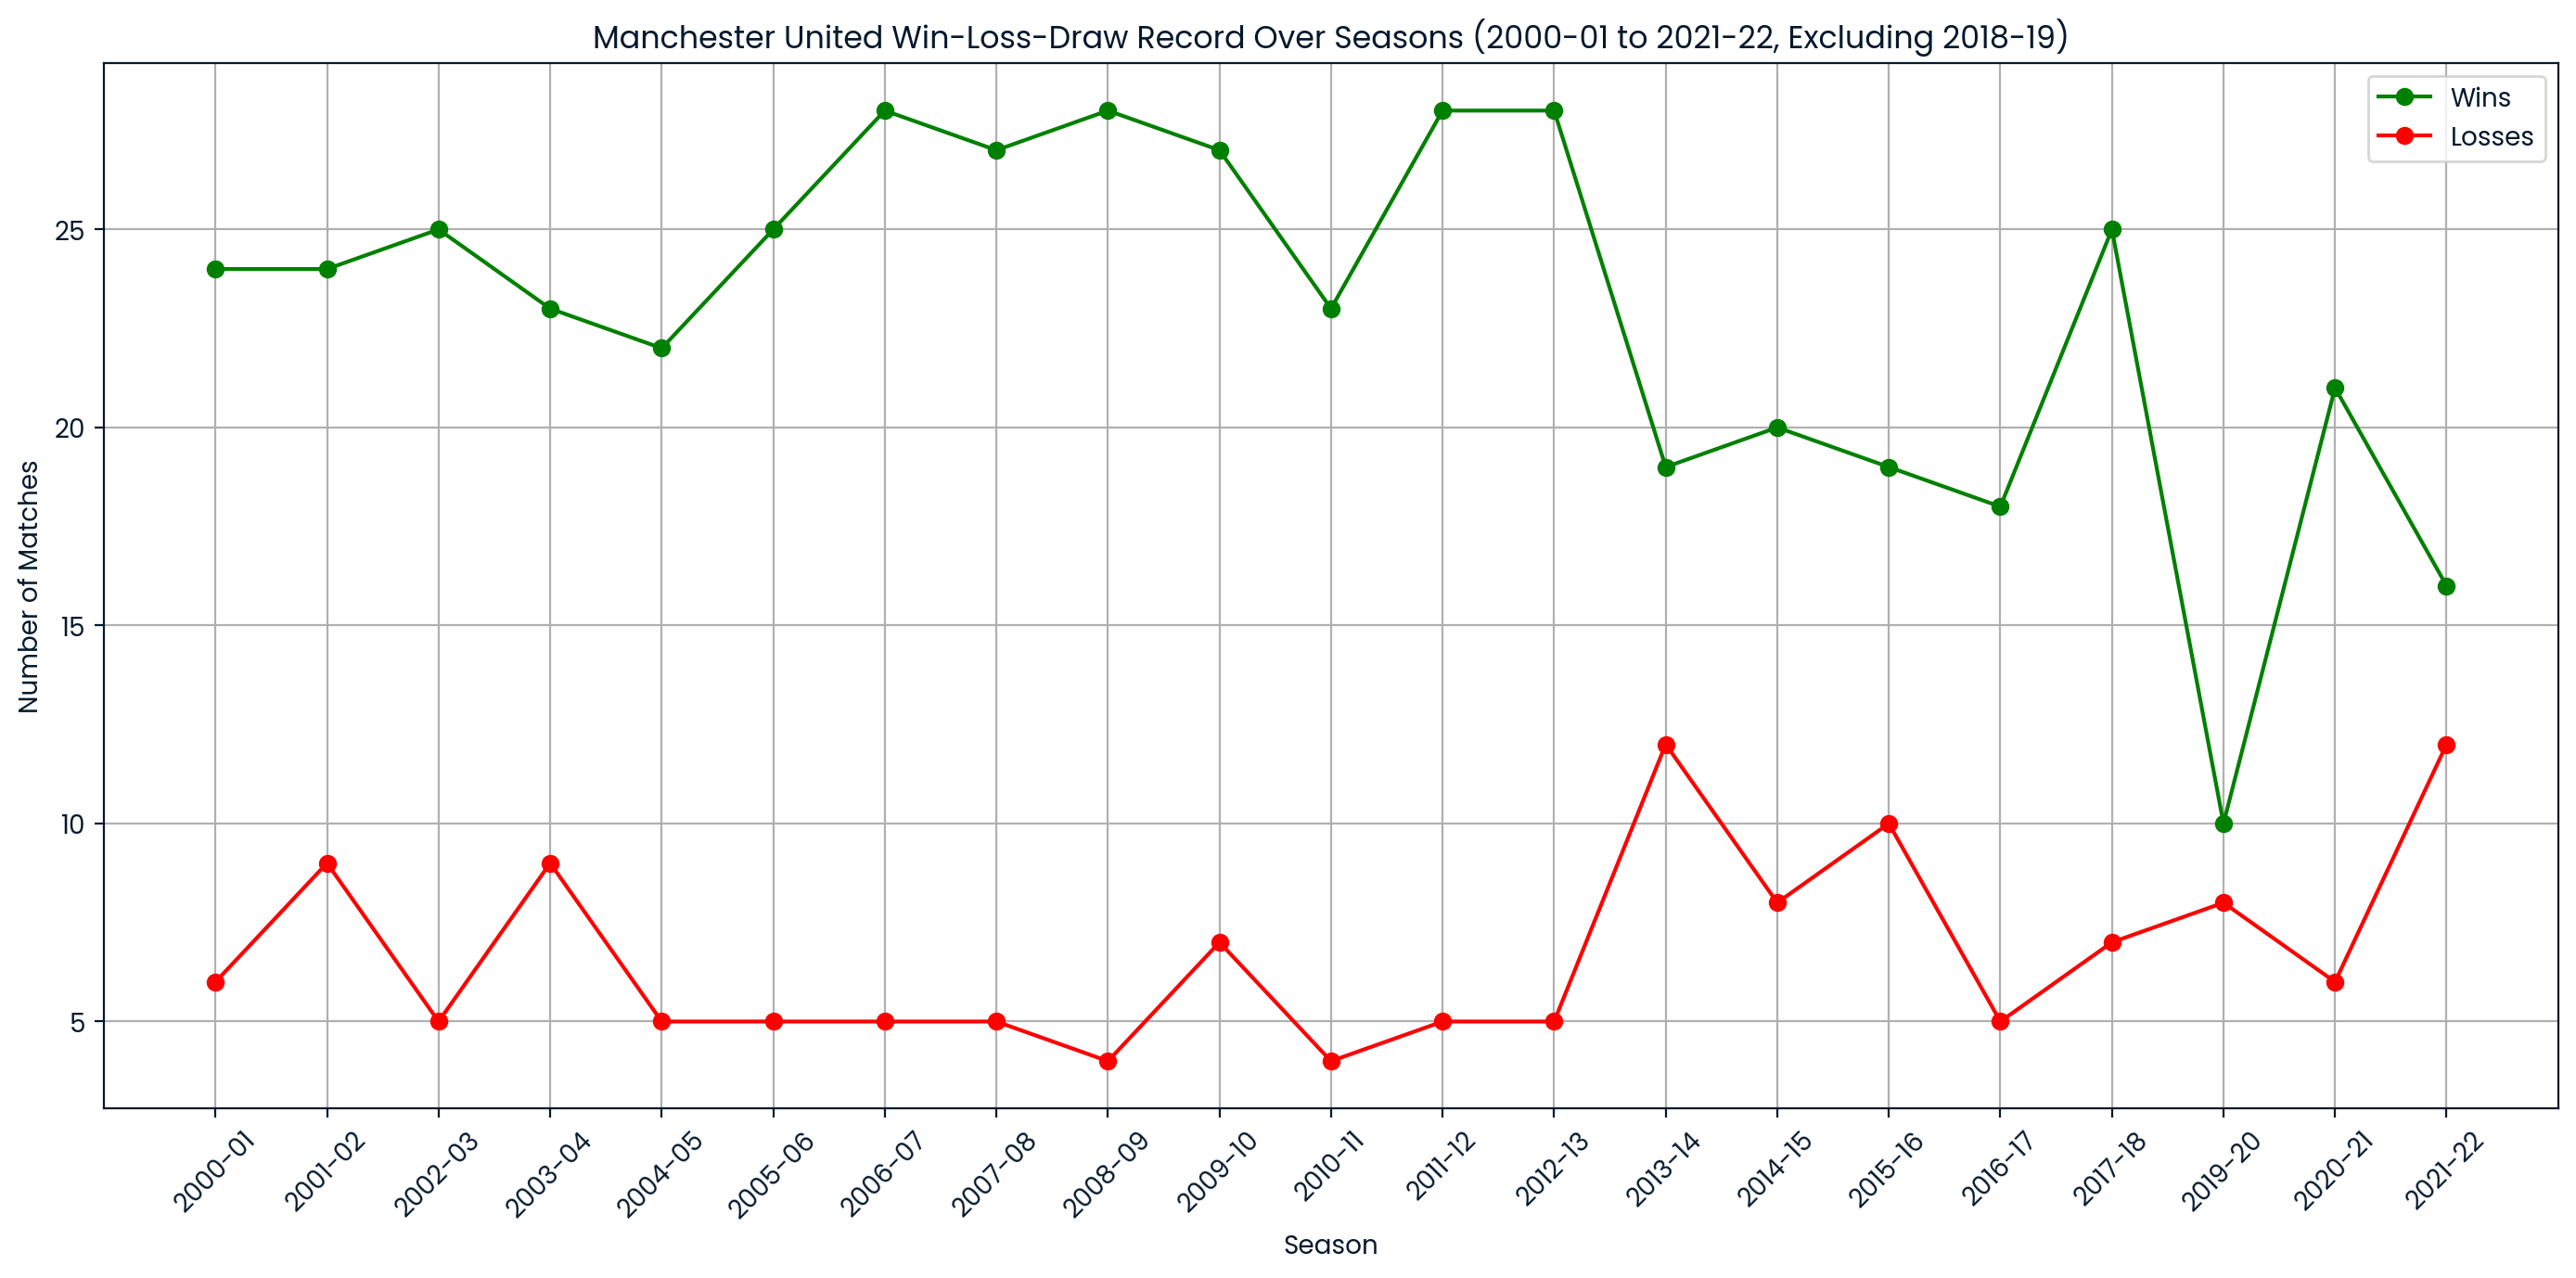

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your directory containing the CSV files
path = ""  # Change this to your directory containing the CSV files

# List of specific CSV file names
csv_files = [
    "2000-01.csv", "2001-02.csv", "2002-03.csv", "2003-04.csv",
    "2004-05.csv", "2005-06.csv", "2006-07.csv", "2007-08.csv",
    "2008-09.csv", "2009-10.csv", "2010-11.csv", "2011-12.csv",
    "2012-13.csv", "2013-14.csv", "2014-15.csv", "2015-16.csv",
    "2016-17.csv", "2017-18.csv", "2019-20.csv",
    "2020-21.csv", "2021-22.csv"
]

# Initialize lists to store wins, losses, and draws
seasons = []
total_wins = []
total_losses = []
total_draws = []

# Iterate through each CSV file
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(f"{path}{file}")
    
    # Filter matches where Manchester United is the home team
    home_matches = df[df['HomeTeam'] == 'Man United']
    away_matches = df[df['AwayTeam'] == 'Man United']
    
    # Calculate wins and losses for home matches
    home_wins = home_matches[home_matches['FTR'] == 'H'].shape[0]  # Manchester United wins at home
    home_losses = home_matches[home_matches['FTR'] == 'A'].shape[0]  # Manchester United loses at home
    home_draws = home_matches[home_matches['FTR'] == 'D'].shape[0]  # Manchester United draws at home
    
    # Calculate wins and losses for away matches
    away_wins = away_matches[away_matches['FTR'] == 'A'].shape[0]  # Manchester United wins away
    away_losses = away_matches[away_matches['FTR'] == 'H'].shape[0]  # Manchester United loses away
    away_draws = away_matches[away_matches['FTR'] == 'D'].shape[0]  # Manchester United draws away
    
    # Total wins, losses, and draws
    total_win = home_wins + away_wins
    total_loss = home_losses + away_losses
    total_draw = home_draws + away_draws

    # Append results
    season_name = file.split('.')[0]  # Season name (e.g., "2000-01")
    if season_name != "2018-19":  # Exclude 2018-19 season
        seasons.append(season_name)
        total_wins.append(total_win)
        total_losses.append(total_loss)
        total_draws.append(total_draw)

# Create a DataFrame for visualization
season_data = pd.DataFrame({
    'Season': seasons,
    'Wins': total_wins,
    'Losses': total_losses,
    'Draws': total_draws
})

# Print the calculated wins, losses, and draws for each season
print(season_data)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(season_data['Season'], season_data['Wins'], label='Wins', marker='o', color='green')
plt.plot(season_data['Season'], season_data['Losses'], label='Losses', marker='o', color='red')
#plt.plot(season_data['Season'], season_data['Draws'], label='Draws', marker='o', color='blue')

plt.title('Manchester United Win-Loss-Draw Record Over Seasons (2000-01 to 2021-22, Excluding 2018-19)')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Remaining NaN values after filling: 0
Columns in performance_data: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA', 'Time', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 

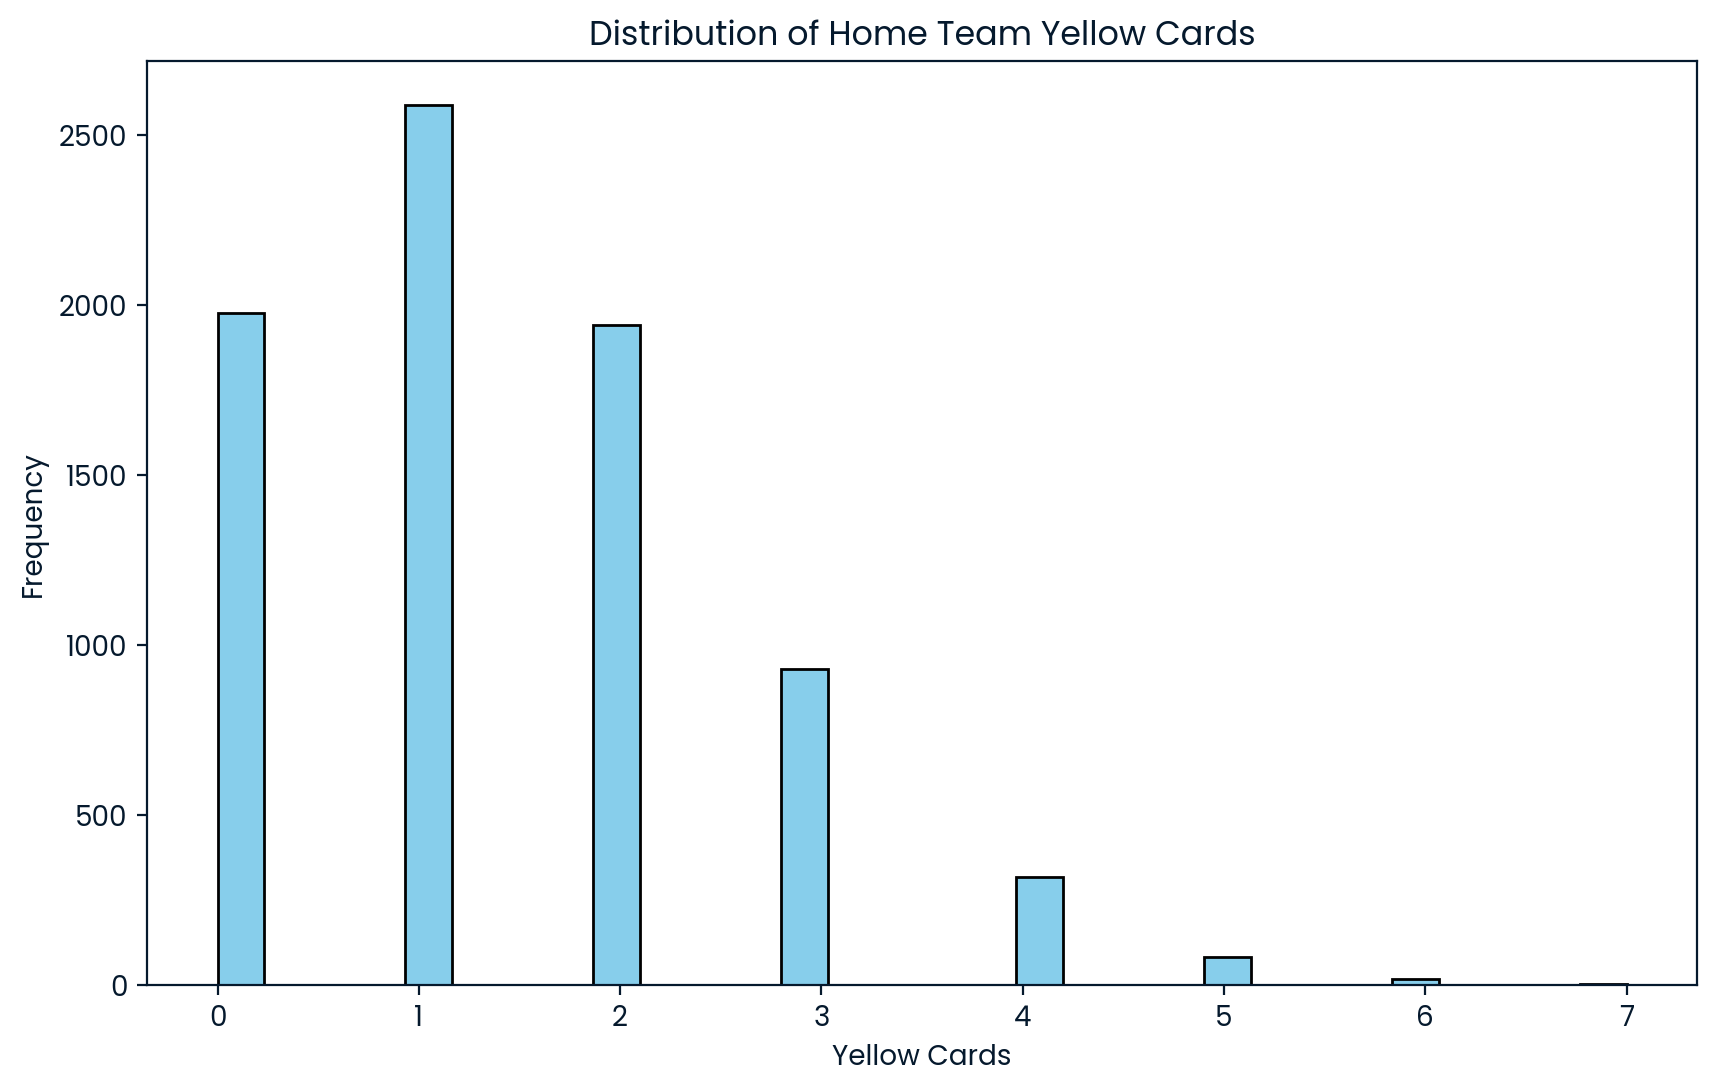

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your directory containing the CSV files
path = ""  # Change this to your directory containing the CSV files

# List of specific CSV file names
csv_files = [
    "2000-01.csv", "2001-02.csv", "2002-03.csv", "2003-04.csv",
    "2004-05.csv", "2005-06.csv", "2006-07.csv", "2007-08.csv",
    "2008-09.csv", "2009-10.csv", "2010-11.csv", "2011-12.csv",
    "2012-13.csv", "2013-14.csv", "2014-15.csv", "2015-16.csv",
    "2016-17.csv", "2017-18.csv", "2019-20.csv",
    "2020-21.csv", "2021-22.csv"
]

# Load and concatenate CSV files into a single DataFrame
performance_data = pd.concat([pd.read_csv(f"{path}{file}") for file in csv_files])

# Fill NaN values with 0, keeping 0 values intact
performance_data = performance_data.fillna(0)

# Check for remaining NaN values to confirm they are handled
print("Remaining NaN values after filling:", performance_data.isnull().sum().sum())

# Display columns and a sample of the data
print("Columns in performance_data:", performance_data.columns.tolist())
print("Performance Data Sample:")
print(performance_data.head())

# Check for missing values
print("Missing Values in DataFrame:")
print(performance_data.isnull().sum())

# Example plot (if you wish to visualize some data after handling NaNs)
# Modify this part as per your analysis needs
plt.figure(figsize=(10, 6))
performance_data['HY'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Home Team Yellow Cards")
plt.xlabel("Yellow Cards")
plt.ylabel("Frequency")
plt.show()


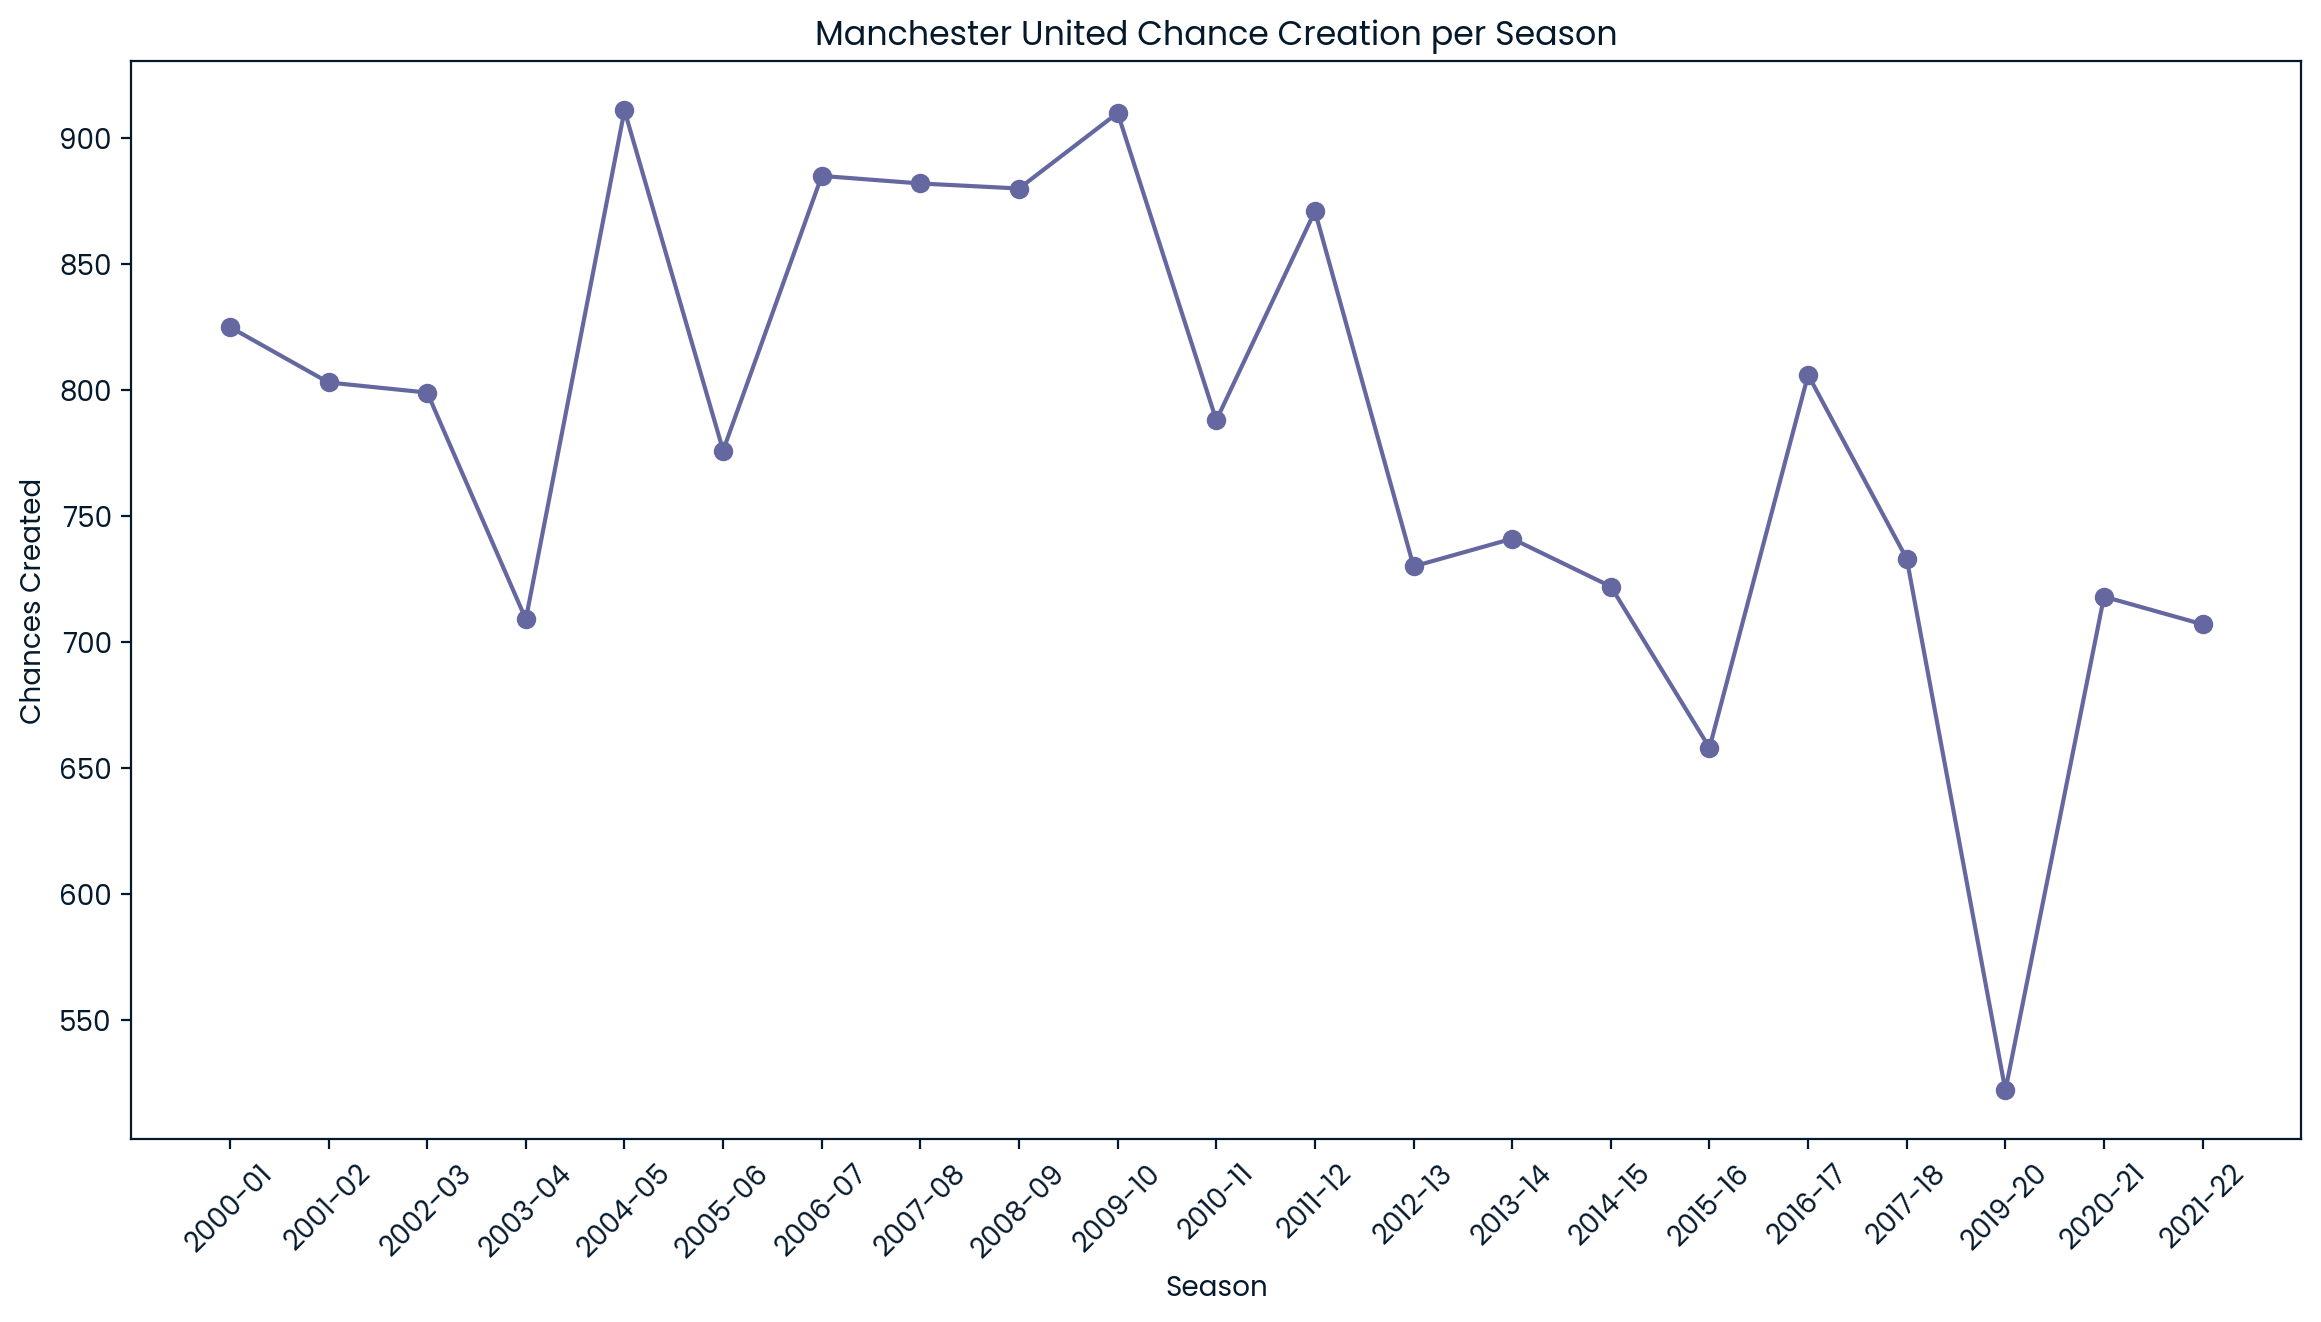

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define path and CSV files
path = ""  # Add your directory path here
csv_files = [
    "2000-01.csv", "2001-02.csv", "2002-03.csv", "2003-04.csv",
    "2004-05.csv", "2005-06.csv", "2006-07.csv", "2007-08.csv",
    "2008-09.csv", "2009-10.csv", "2010-11.csv", "2011-12.csv",
    "2012-13.csv", "2013-14.csv", "2014-15.csv", "2015-16.csv",
    "2016-17.csv", "2017-18.csv", "2019-20.csv",
    "2020-21.csv", "2021-22.csv"
]

# Load and merge data, fill NaN values with 0, and add season column
performance_data = pd.concat([pd.read_csv(f"{path}{file}").assign(Season=file[:7]) for file in csv_files])
performance_data = performance_data.fillna(0)

# Filter data to include only Manchester United games
manu_data = performance_data[
    (performance_data['HomeTeam'] == 'Man United') | (performance_data['AwayTeam'] == 'Man United')
]

# Calculate performance metrics including chance creation
def calculate_team_performance(data):
    data['Goals_Scored'] = data.apply(
        lambda x: x['FTHG'] if x['HomeTeam'] == 'Man United' else x['FTAG'], axis=1
    )
    data['Goals_Conceded'] = data.apply(
        lambda x: x['FTAG'] if x['HomeTeam'] == 'Man United' else x['FTHG'], axis=1
    )
    data['Chances_Created'] = data.apply(
        lambda x: x['HS'] + x['HC'] if x['HomeTeam'] == 'Man United' else x['AS'] + x['AC'], axis=1
    )
    data['Shot_Efficiency'] = data.apply(
        lambda x: (x['HST'] / x['HS']) if x['HomeTeam'] == 'Man United' and x['HS'] > 0 else (x['AST'] / x['AS']) if x['AS'] > 0 else 0, axis=1
    )
    return data

manu_data = calculate_team_performance(manu_data)

# Group by season for aggregated analysis
season_performance = manu_data.groupby('Season').agg({
    'Goals_Scored': 'sum',
    'Goals_Conceded': 'sum',
    'Chances_Created': 'sum',
    'Shot_Efficiency': 'mean'
}).reset_index()

# Plotting Chance Creation over Seasons
plt.figure(figsize=(14, 7))
plt.plot(season_performance['Season'], season_performance['Chances_Created'], label='Chances Created', marker='o')
plt.title("Manchester United Chance Creation per Season")
plt.xlabel("Season")
plt.ylabel("Chances Created")
plt.xticks(rotation=45)
plt.show()


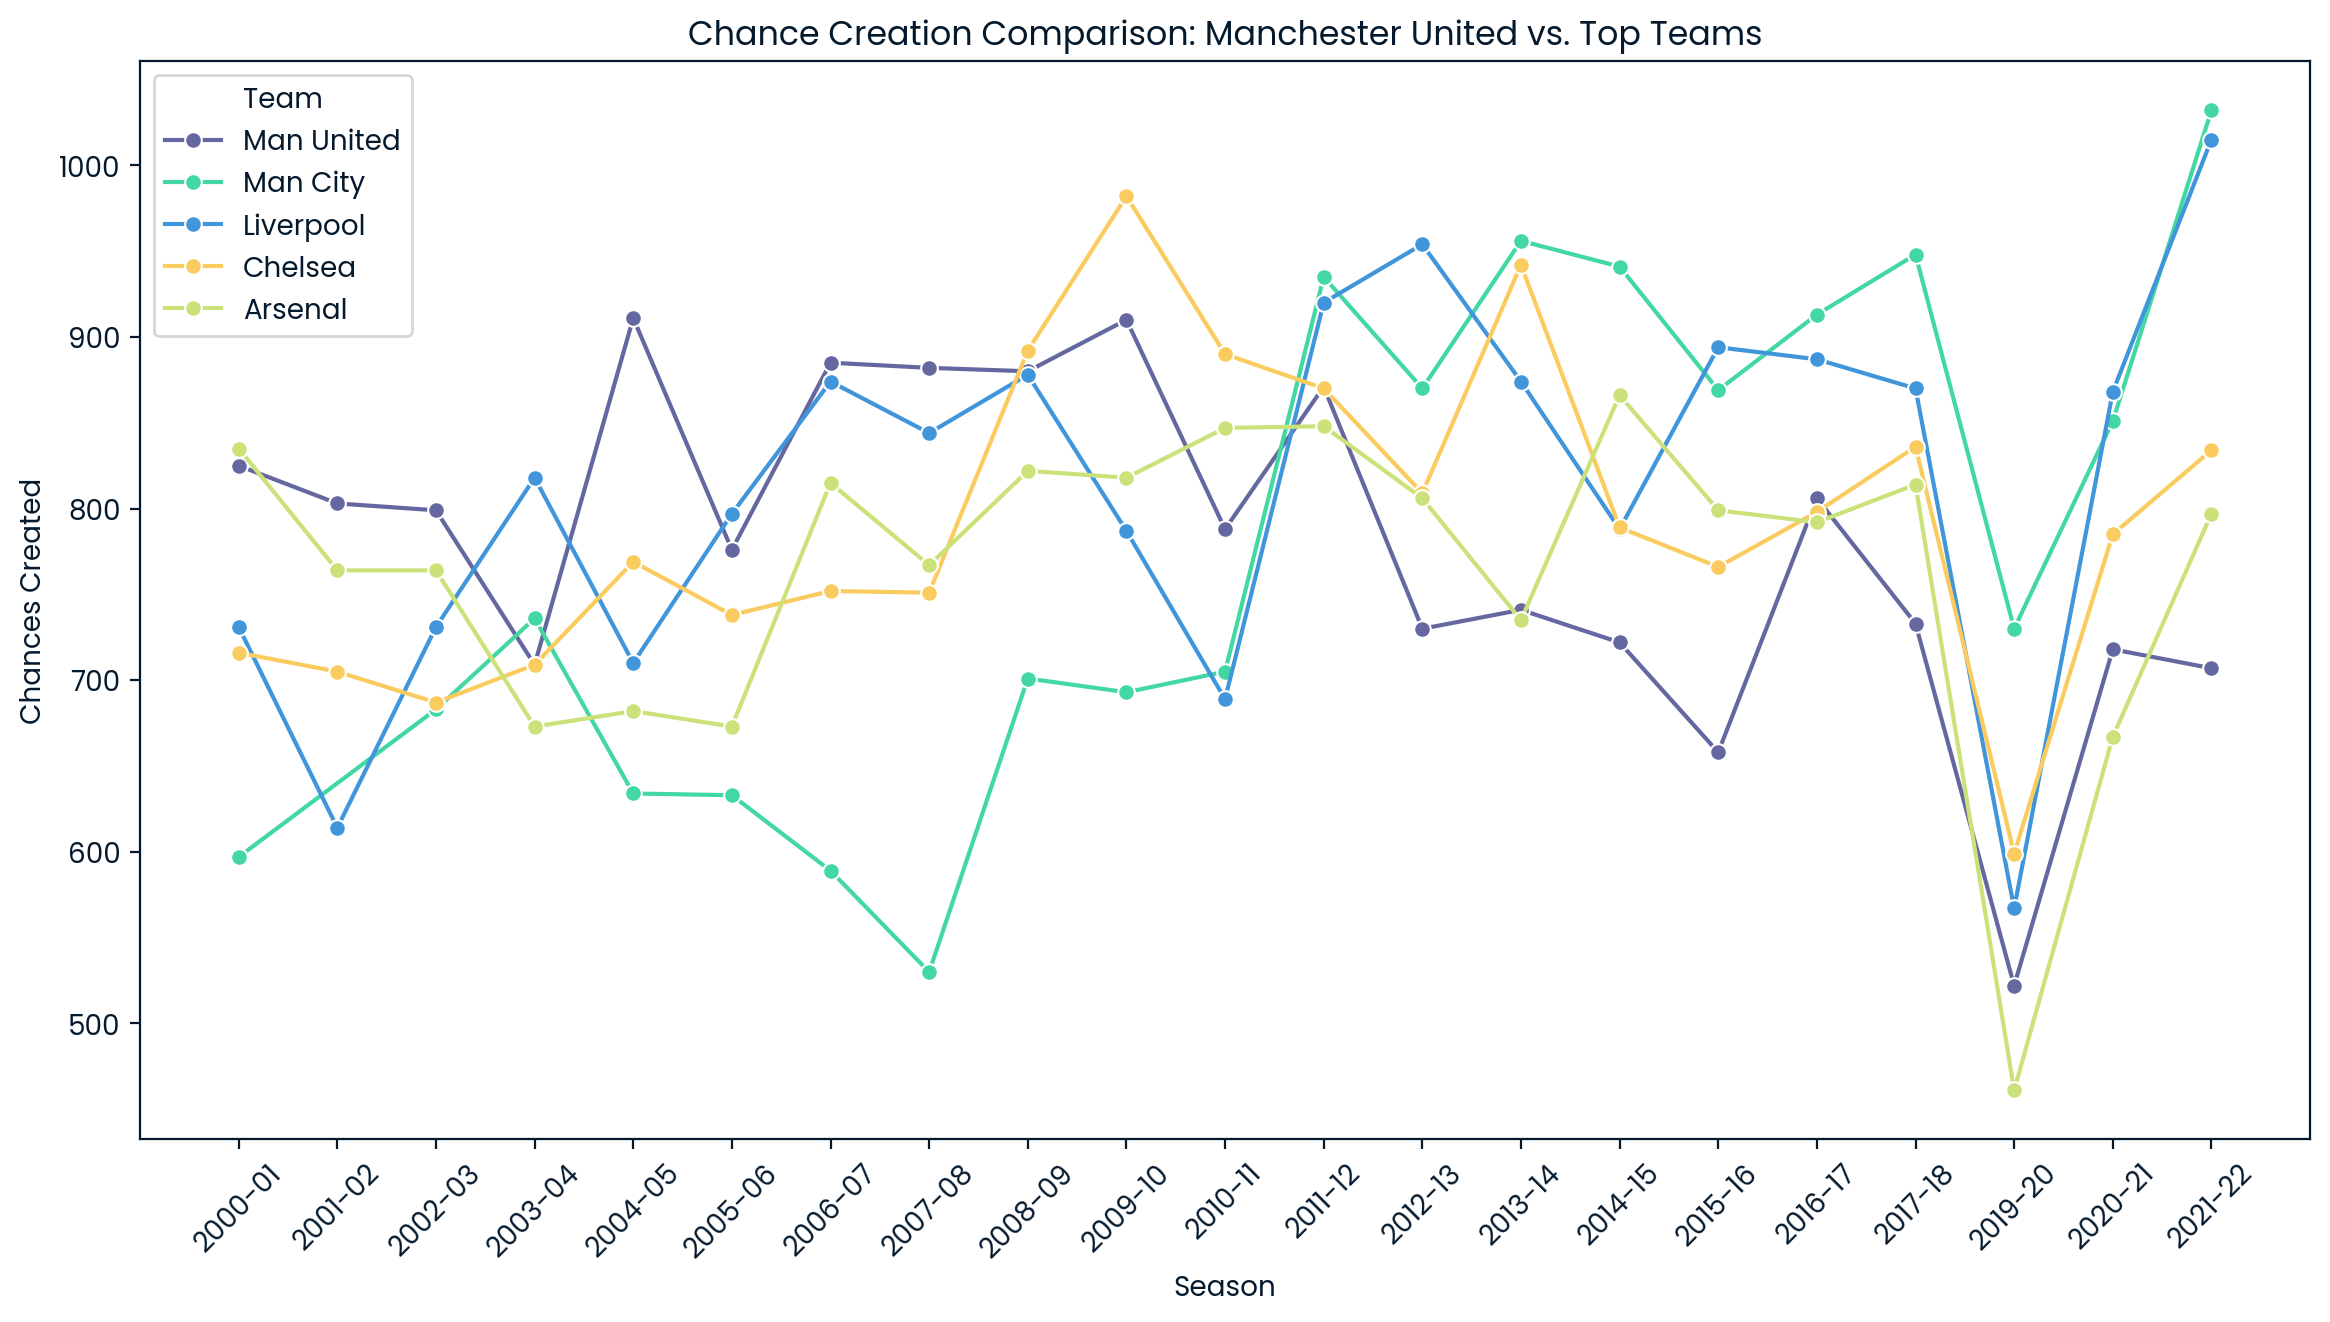

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define path and CSV files
path = ""  # Add your directory path here
csv_files = [
    "2000-01.csv", "2001-02.csv", "2002-03.csv", "2003-04.csv",
    "2004-05.csv", "2005-06.csv", "2006-07.csv", "2007-08.csv",
    "2008-09.csv", "2009-10.csv", "2010-11.csv", "2011-12.csv",
    "2012-13.csv", "2013-14.csv", "2014-15.csv", "2015-16.csv",
    "2016-17.csv", "2017-18.csv", "2019-20.csv",
    "2020-21.csv", "2021-22.csv"
]

# Load and merge data for Manchester United and top teams
def load_and_merge_data(path, csv_files):
    data = pd.concat([pd.read_csv(f"{path}{file}").assign(Season=file[:7]) for file in csv_files])
    return data.fillna(0)

# Load data
performance_data = load_and_merge_data(path, csv_files)

# Define teams to compare
teams_to_compare = ['Man United', 'Man City', 'Liverpool', 'Chelsea', 'Arsenal']

# Function to filter and calculate performance metrics
def calculate_team_performance(data, team_name):
    team_data = data[
        (data['HomeTeam'] == team_name) | (data['AwayTeam'] == team_name)
    ]
    team_data['Goals_Scored'] = team_data.apply(
        lambda x: x['FTHG'] if x['HomeTeam'] == team_name else x['FTAG'], axis=1
    )
    team_data['Goals_Conceded'] = team_data.apply(
        lambda x: x['FTAG'] if x['HomeTeam'] == team_name else x['FTHG'], axis=1
    )
    
    # Calculate chances created based on total shots and corners
    team_data['Chances_Created'] = team_data.apply(
        lambda x: x['HS'] + x['HC'] if x['HomeTeam'] == team_name else x['AS'] + x['AC'], axis=1
    )
    
    # Group by season to aggregate chances created
    return team_data.groupby('Season').agg({'Chances_Created': 'sum'}).reset_index()

# Prepare a DataFrame to hold results
results = []

# Calculate performance metrics for each team
for team in teams_to_compare:
    team_performance = calculate_team_performance(performance_data, team)
    team_performance['Team'] = team
    results.append(team_performance)

# Combine all results into a single DataFrame
all_teams_performance = pd.concat(results)

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=all_teams_performance, x='Season', y='Chances_Created', hue='Team', marker='o')
plt.title("Chance Creation Comparison: Manchester United vs. Top Teams")
plt.xlabel("Season")
plt.ylabel("Chances Created")
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()


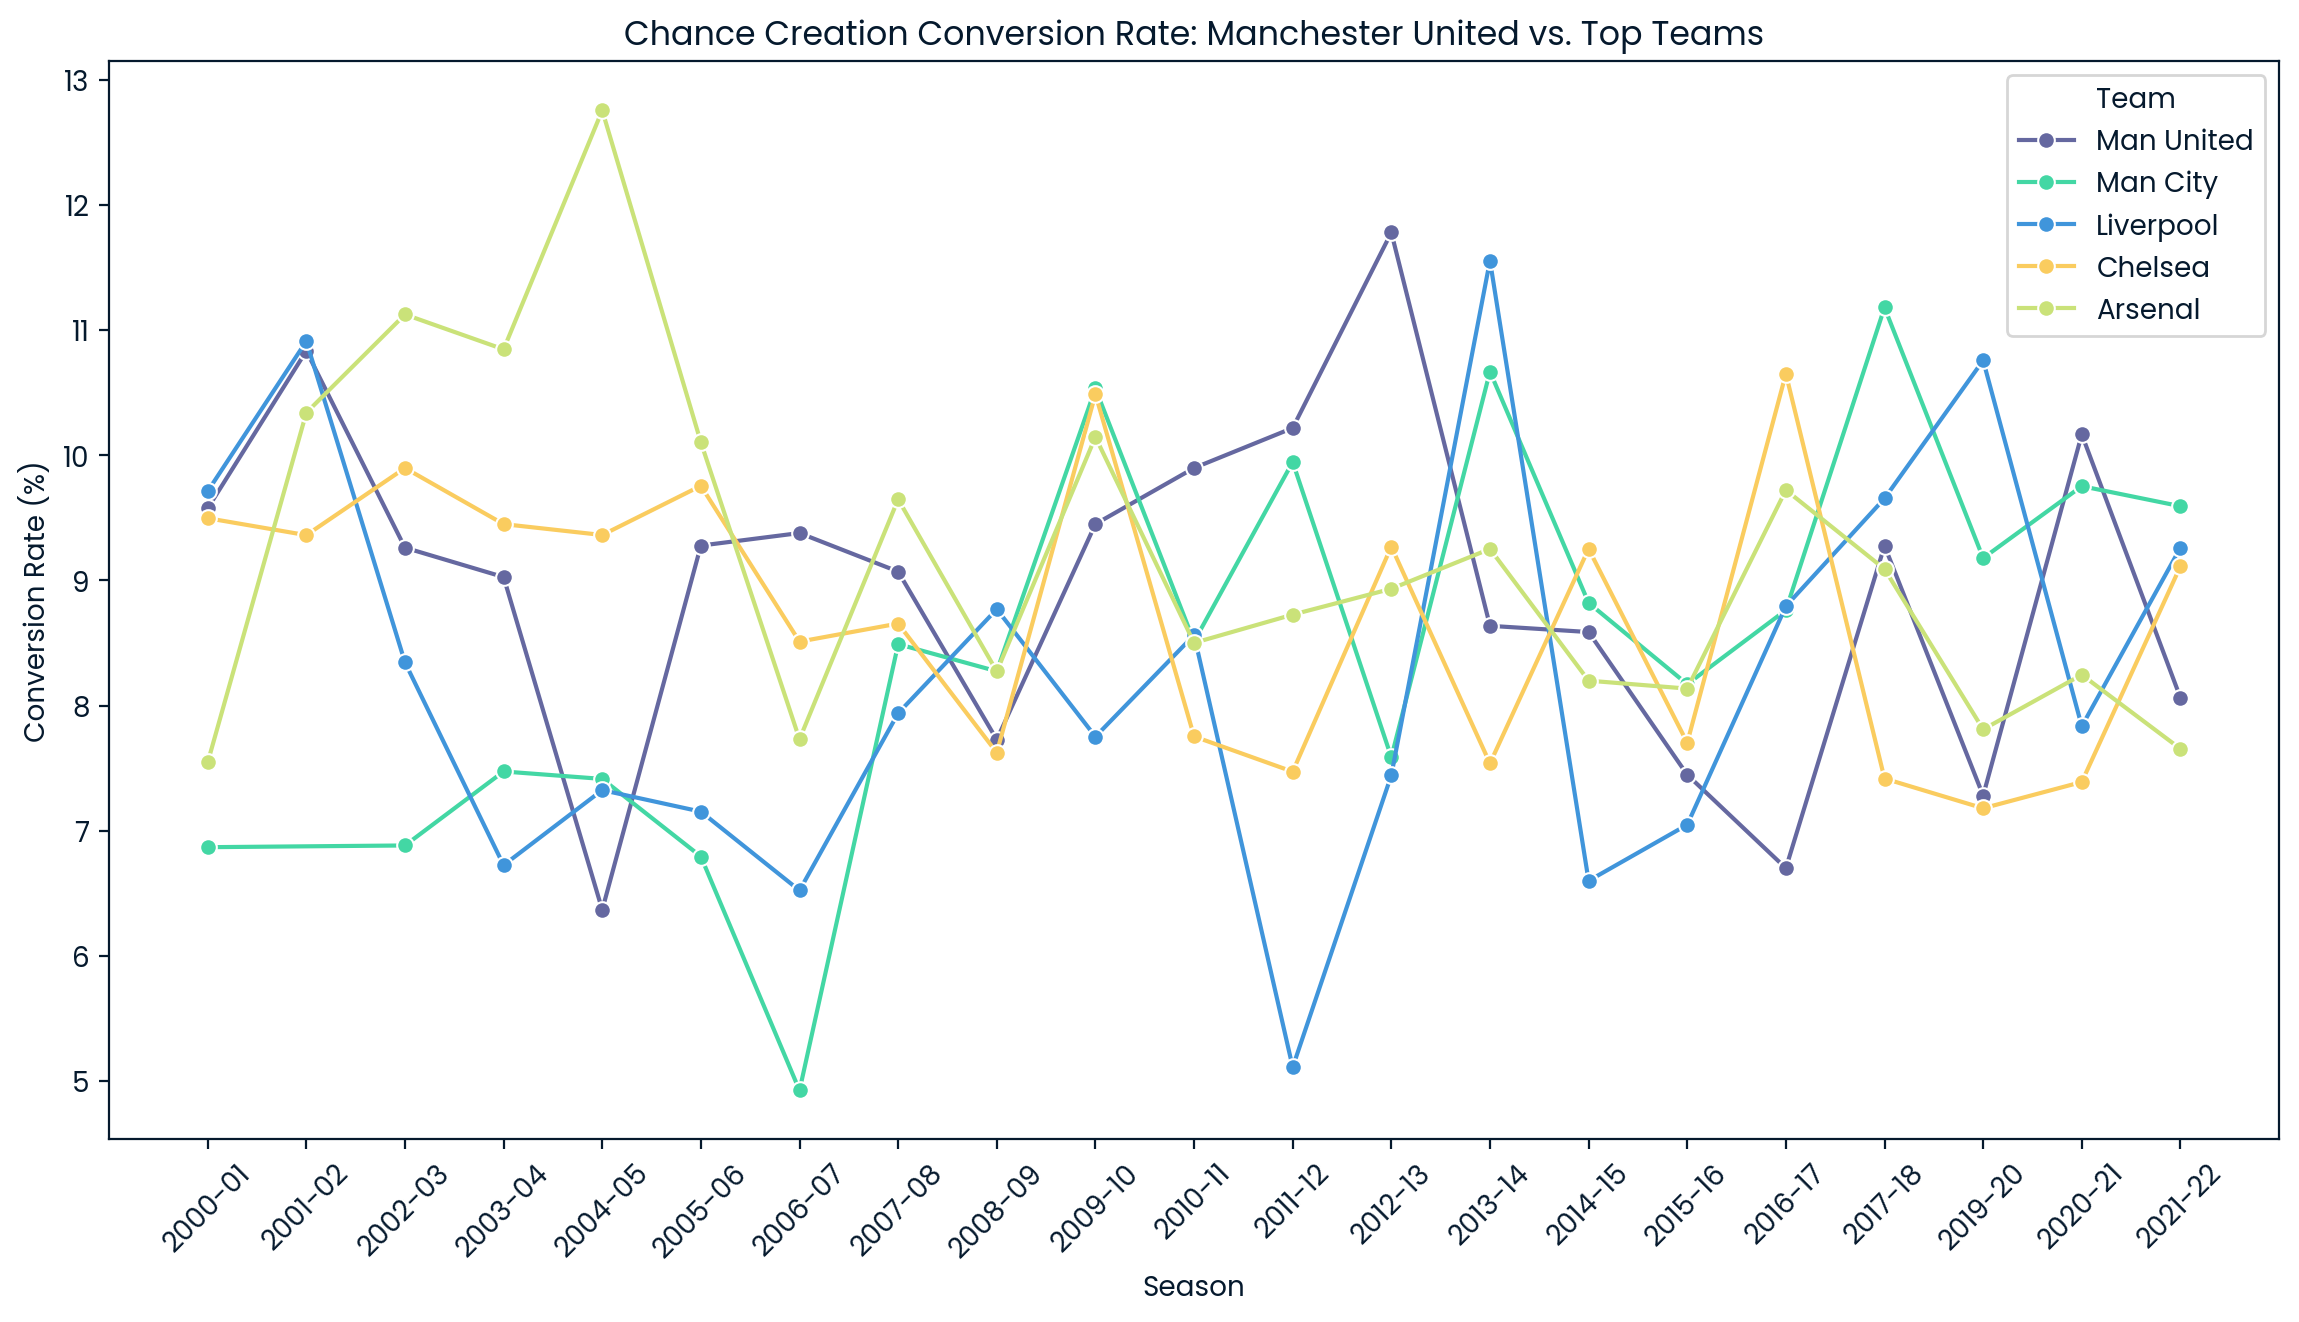

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define path and CSV files
path = ""  # Add your directory path here
csv_files = [
    "2000-01.csv", "2001-02.csv", "2002-03.csv", "2003-04.csv",
    "2004-05.csv", "2005-06.csv", "2006-07.csv", "2007-08.csv",
    "2008-09.csv", "2009-10.csv", "2010-11.csv", "2011-12.csv",
    "2012-13.csv", "2013-14.csv", "2014-15.csv", "2015-16.csv",
    "2016-17.csv", "2017-18.csv", "2019-20.csv",
    "2020-21.csv", "2021-22.csv"
]

# Load and merge data
def load_and_merge_data(path, csv_files):
    data = pd.concat([pd.read_csv(f"{path}{file}").assign(Season=file[:7]) for file in csv_files])
    return data.fillna(0)

# Load data
performance_data = load_and_merge_data(path, csv_files)

# Define teams to compare
teams_to_compare = ['Man United', 'Man City', 'Liverpool', 'Chelsea', 'Arsenal']

# Function to filter and calculate performance metrics
def calculate_team_performance(data, team_name):
    team_data = data[
        (data['HomeTeam'] == team_name) | (data['AwayTeam'] == team_name)
    ].copy()  # Use copy to avoid SettingWithCopyWarning
    
    # Calculate goals scored and conceded
    team_data['Goals_Scored'] = team_data.apply(
        lambda x: x['FTHG'] if x['HomeTeam'] == team_name else x['FTAG'], axis=1
    )
    team_data['Goals_Conceded'] = team_data.apply(
        lambda x: x['FTAG'] if x['HomeTeam'] == team_name else x['FTHG'], axis=1
    )
    
    # Calculate chances created based on shots and corners
    team_data['Chances_Created'] = team_data.apply(
        lambda x: x['HS'] + x['HC'] if x['HomeTeam'] == team_name else x['AS'] + x['AC'], axis=1
    )
    
    # Group by season to aggregate chances created and goals scored
    aggregated_data = team_data.groupby('Season').agg({
        'Chances_Created': 'sum',
        'Goals_Scored': 'sum'
    }).reset_index()
    
    # Calculate conversion rate
    aggregated_data['Conversion_Rate'] = (
        aggregated_data['Goals_Scored'] / aggregated_data['Chances_Created']
    ).replace([float('inf'), -float('inf')], 0).fillna(0) * 100  # Handle divide by zero
    aggregated_data['Team'] = team_name  # Add team name for reference
    return aggregated_data

# Prepare a DataFrame to hold results
results = []

# Calculate performance metrics for each team
for team in teams_to_compare:
    team_performance = calculate_team_performance(performance_data, team)
    results.append(team_performance)

# Combine all results into a single DataFrame
all_teams_performance = pd.concat(results)

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=all_teams_performance, x='Season', y='Conversion_Rate', hue='Team', marker='o')
plt.title("Chance Creation Conversion Rate: Manchester United vs. Top Teams")
plt.xlabel("Season")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()
